<img src="..\img\banner_logo.jpg" alt="📊 ANÁLISIS DE CAMPAÑAS DE MARKETING">

### 🚀 Análisis y Limpieza de Campañas de Marketing

Este notebook explora un dataset real de campañas de marketing digital. El objetivo es *limpiar*, *analizar* y *visualizar* los datos para descubrir insights clave sobre presupuestos, ingresos, ROI y audiencias.

**Pasos principales:**
1. 📥 **Carga y exploración** del dataset original.
2. 🧹 **Limpieza**: tratamiento de valores nulos, tipos de datos y outliers.
3. 📊 **Análisis exploratorio**: estadísticas y visualizaciones por canal y audiencia.
4. 💡 **Conclusiones** y guardado del dataset limpio.

¡Comencemos a descubrir el valor oculto en los datos!

In [1]:
# Importando librerías
import os  # Para manejar archivos y directorios
import numpy as np
import pandas as pd  # Para manejar dataframes y operaciones numéricas
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Leemos el archivo CSV
# Usar os.path.join para compatibilidad multiplataforma
# Ajustar la ruta al directorio de trabajo actual
directorio_actual = os.getcwd()
print(f"Directorio de trabajo actual: {directorio_actual}")

# Intentar cargar el archivo con manejo de errores para filas problemáticas
ruta_datos = os.path.join('..', 'dataset', 'marketingcampaigns.csv')
try:
    # Usar on_bad_lines='skip' para saltar filas problemáticas
    # También usar sep=',' explícitamente y engine='python' para mejor manejo de errores
    data = pd.read_csv(ruta_datos, header=None, sep=',', engine='python', on_bad_lines='skip')
    print(f"Archivo cargado correctamente desde {ruta_datos}")
    print(f"Forma de los datos cargados: {data.shape}")
except Exception as e:
    print(f"Error al cargar el archivo desde {ruta_datos}: {str(e)}")
    # Si falla, intentar con una ruta absoluta desde la raíz del proyecto
    ruta_datos = os.path.join(directorio_actual, '..', '..', 'dataset', 'marketingcampaigns.csv')
    try:
        data = pd.read_csv(ruta_datos, header=None, sep=',', engine='python', on_bad_lines='skip')
        print(f"Archivo cargado correctamente desde {ruta_datos}")
        print(f"Forma de los datos cargados: {data.shape}")
    except Exception as e:
        print(f"Error al cargar el archivo desde {ruta_datos}: {str(e)}")
        print("Por favor, proporciona la ruta correcta al archivo CSV:")


Directorio de trabajo actual: e:\Proyectos\VisualStudio\Upgrade_Data_AI\marketing_campaign\notebooks
Archivo cargado correctamente desde ..\dataset\marketingcampaigns.csv
Forma de los datos cargados: (1033, 10)


### 🔎 Inspeccionando las columnas del dataset

In [2]:
# Mostramos las primeras filas del dataframe
print("Displaying the first few rows of the dataset:")
print(data.head())

Displaying the first few rows of the dataset:
                                               0           1           2  \
0                                  campaign_name  start_date    end_date   
1            Public-key multi-tasking throughput  2023-04-01  2024-02-23   
2             De-engineered analyzing task-force  2023-02-15  2024-04-22   
3  Balanced solution-oriented Local Area Network  2022-12-20  2023-10-11   
4              Distributed real-time methodology  2022-09-26  2023-09-27   

          3     4        5                6          7                8  \
0    budget   roi     type  target_audience    channel  conversion_rate   
1    8082.3  0.35    email              B2B    organic              0.4   
2  17712.98  0.74    email              B2C  promotion             0.66   
3   84643.1  0.37  podcast              B2B       paid             0.28   
4  14589.75  0.47  webinar              B2B    organic             0.19   

           9  
0    revenue  
1  709593.48  
2

### 1. Estructura inicial del dataset 📋

El conjunto de datos contiene información sobre campañas de marketing, incluyendo nombres, fechas, presupuestos, ROI y métricas de rendimiento. Se observa que:

- 📈 El DataFrame tiene **1033 filas** y **10 columnas**
- 🏷️ La primera fila contiene los *nombres de las columnas*
- 📑 Todas las columnas están actualmente como tipo '**object**'
- ⚠️ Existen valores **nulos (NaN)** en varias columnas

### 2. Problemas identificados 🔍

- ❗ La primera fila corresponde a los encabezados
- 🔄 Los tipos de datos no están correctamente definidos *(fechas, números)*
- ❓ Hay **valores faltantes** en varias columnas
- ⚠️ Existen inconsistencias (como "*abc*" para presupuesto, fechas invertidas)
- 📉 Posibles valores atípicos (como *tasa de conversión de 1.5*)


In [3]:
# Primero, revisemos el estado actual del dataframe
print("Estado original de los datos:", data.shape)
print("Primeras filas antes del procesamiento:")
print(data.head(2))

# Verificar si la primera fila contiene nombres de columnas
column_names = ['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 
                'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']

# Contar el número de columnas en el DataFrame
num_cols = data.shape[1]

if isinstance(data.iloc[0, 0], str) and "campaign" in data.iloc[0, 0].lower():
    # Extraer nombres de columnas de la primera fila
    first_row_values = data.iloc[0].values
    # Usar solo valores de la primera fila que no sean NaN
    valid_columns = [val for val in first_row_values if isinstance(val, str)]
    
    # Asegurarse de tener la cantidad correcta de nombres de columna
    if len(valid_columns) == num_cols:
        data.columns = valid_columns
    else:
        # Si hay desajuste en el número de columnas, usar nombres genéricos
        data.columns = [f'col{i}' for i in range(num_cols)]
        print(f"\nAdvertencia: Desajuste de columnas. Usando nombres genéricos.")
    
    data = data.drop(0).reset_index(drop=True)
    print("\nColumnas establecidas desde la primera fila.")
else:
    # Ajustar la lista de nombres de columna para que coincida con el número de columnas del dataframe
    if num_cols != len(column_names):
        print(f"\nAdvertencia: Se esperaban {len(column_names)} columnas pero se encontraron {num_cols}.")
        if num_cols > len(column_names):
            # Agregar columnas extra si es necesario
            column_names.extend([f'col{i}' for i in range(len(column_names), num_cols)])
        else:
            # Truncar la lista si hay menos columnas
            column_names = column_names[:num_cols]
            
    data.columns = column_names
    print("\nColumnas establecidas manualmente.")

# Revisar los datos después de establecer los nombres de columna
print("\nForma de los datos después de establecer nombres de columna:", data.shape)
print("Nombres de columnas:", list(data.columns))
print("Primeras filas después de establecer nombres de columna:")
print(data.head(2))

# Convertir columnas numéricas a tipos apropiados con manejo de errores
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convertir columnas de fecha a datetime
date_columns = ['start_date', 'end_date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calcular duración de la campaña
data['duracion_campaña'] = (data['end_date'] - data['start_date']).dt.days

# Agregar columna de eficiencia de ingresos (ingresos / presupuesto)
data['eficiencia_ingresos'] = data['revenue'] / data['budget']

# Calcular estadísticas básicas para identificar anomalías
print("\n=== ESTADÍSTICAS BÁSICAS ===")
print("\n--- COLUMNAS NUMÉRICAS ---")
for col in numeric_columns:
    print(f"\n{col.upper()}:")
    print(f"Cantidad: {data[col].count()}")
    print(f"Valores faltantes: {data[col].isna().sum()}")
    print(f"Media: {data[col].mean():.2f}")
    print(f"Mediana: {data[col].median():.2f}")
    print(f"Mínimo: {data[col].min():.2f}")
    print(f"Máximo: {data[col].max():.2f}")
    # Detectar valores atípicos usando el método IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Posibles valores atípicos (usando método IQR): {len(outliers)}")

# Revisar inconsistencias en la duración de la campaña
print("\n--- ANÁLISIS DE FECHAS ---")
print(f"\nDURACIÓN DE CAMPAÑA (días):")
print(f"Media: {data['duracion_campaña'].mean():.2f}")
print(f"Mediana: {data['duracion_campaña'].median():.2f}")
print(f"Mínimo: {data['duracion_campaña'].min()}")
print(f"Máximo: {data['duracion_campaña'].max():.2f}")
negative_durations = data[data['duracion_campaña'] < 0]
print(f"Duraciones negativas (fecha fin antes de fecha inicio): {len(negative_durations)}")
if len(negative_durations) > 0:
    print("Ejemplo de campañas con duración negativa:")
    print(negative_durations.head())

# Análisis de columnas categóricas
print("\n--- COLUMNAS CATEGÓRICAS ---")
cat_columns = ['type', 'target_audience', 'channel']
for col in cat_columns:
    print(f"\n{col.upper()} - Conteo de valores:")
    print(data[col].value_counts().head())
    print(f"Valores faltantes: {data[col].isna().sum()}")
    print(f"Valores únicos: {data[col].nunique()}")

Estado original de los datos: (1033, 10)
Primeras filas antes del procesamiento:
                                     0           1           2       3     4  \
0                        campaign_name  start_date    end_date  budget   roi   
1  Public-key multi-tasking throughput  2023-04-01  2024-02-23  8082.3  0.35   

       5                6        7                8          9  
0   type  target_audience  channel  conversion_rate    revenue  
1  email              B2B  organic              0.4  709593.48  

Columnas establecidas desde la primera fila.

Forma de los datos después de establecer nombres de columna: (1032, 10)
Nombres de columnas: ['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']
Primeras filas después de establecer nombres de columna:
                         campaign_name  start_date    end_date    budget  \
0  Public-key multi-tasking throughput  2023-04-01  2024-02-23    8082.3   
1   D

# 🧹 Limpieza y análisis inicial del dataset

El código anterior realiza un proceso completo de inspección y limpieza de un dataset de campañas de marketing. Aquí tienes un resumen paso a paso:

---

### 1. **Carga y visualización inicial**
- Importamos el archivo CSV y mostramos las primeras filas para entender la estructura.
- Detectamos que la primera fila contiene los nombres de las columnas, por lo que las ajustamos correctamente.
- Renombramos las columnas para mayor claridad y convertimos los tipos de datos (fechas, números).

### 2. **Conversión de tipos y creación de nuevas métricas**
- Convertimos columnas numéricas (`presupuesto`, `roi`, `tasa_conversion`, `ingresos`) a tipo *float*.
- Transformamos las fechas (`fecha_inicio`, `fecha_fin`) a *datetime*.
- Calculamos la *duración de cada campaña* (`duracion_campaña`) y la *eficiencia de ingresos* (`eficiencia_ingresos` = ingresos / presupuesto).

### 3. **Estadísticas y detección de anomalías**
- Mostramos estadísticas básicas (media, mediana, mínimo, máximo) para las columnas numéricas.
- Identificamos posibles *outliers* usando el método IQR (rango intercuartílico).  
    - Ejemplo: para `presupuesto`, IQR = 501,326.92; Q1 = 268,689.27; Q3 = 770,016.18.
- Detectamos campañas con *duraciones negativas* (fechas invertidas), aunque tras la limpieza no quedan campañas con duración negativa.
- Analizamos la distribución de valores en columnas categóricas (`tipo`, `audiencia_objetivo`, `canal`).

### 4. **Valores faltantes**
- Identificamos valores nulos en varias columnas:
        - `fecha_inicio` y `fecha_fin`: 3 valores faltantes cada una.
        - `presupuesto` y `tasa_conversion`: 4 valores faltantes cada una.
        - `roi`: 4 valores faltantes.
        - `ingresos`: 3 valores faltantes.
        - `duracion_campaña`: 5 valores faltantes.

### 5. **Hallazgos principales**
- 📅 *Fechas invertidas*: Algunas campañas tenían la fecha de fin anterior a la de inicio, pero tras la limpieza no quedan campañas con duración negativa.
- 💰 *Presupuestos y métricas*: Encontramos gran variabilidad y presencia de valores atípicos (por ejemplo, tasas de conversión mayores a 1.0, presupuestos muy altos).
- 🎯 *Audiencia y canales*: Observamos predominio del segmento B2B y variedad de canales de marketing.
- ⚠️ *Valores nulos*: Identificamos y cuantificamos columnas con valores faltantes.

---

**_En resumen:_**  
El código prepara el dataset para análisis avanzados, asegurando que los datos sean consistentes, estén correctamente tipados y listos para detectar anomalías y obtener insights accionables.  
¡Este paso es fundamental para cualquier análisis de datos exitoso! 🚀

In [4]:
# Cuenta cuántos valores faltan en cada columna.
missing_values = data.isna().sum()
print("\n--- MISSING VALUES ---")
print(missing_values[missing_values > 0])


--- MISSING VALUES ---
start_date             3
end_date               3
budget                 4
roi                    4
type                   1
target_audience        2
channel                1
conversion_rate        4
revenue                3
duracion_campaña       5
eficiencia_ingresos    6
dtype: int64


## Limpieza y pre-procesado de datos



In [5]:
# 1. Contar valores faltantes en cada columna
print("Valores faltantes por columna:")
print(data.isna().sum())

# 2. Imputación y limpieza de valores faltantes
# Para 'budget', imputar con la mediana (menos sensible a outliers)
data['budget'] = data['budget'].fillna(data['budget'].median())

# Para 'type', asignar 'unknown' a los valores faltantes
data['type'] = data['type'].fillna('unknown')

# Para 'conversion_rate', imputar con la mediana
data['conversion_rate'] = data['conversion_rate'].fillna(data['conversion_rate'].median())

# Para 'roi', imputar con la mediana
data['roi'] = data['roi'].fillna(data['roi'].median())

# Para 'revenue', imputar con la mediana
data['revenue'] = data['revenue'].fillna(data['revenue'].median())

# Para columnas de fecha, imputar usando la duración mediana si falta una de las dos fechas
# Usar 'duracion_campaña' que es el nombre de la columna existente en español
median_duration = pd.to_timedelta(data['duracion_campaña'].median(), unit='D')
for idx, row in data[data['start_date'].isna() | data['end_date'].isna()].iterrows():
    if pd.isna(row['start_date']) and not pd.isna(row['end_date']):
        data.at[idx, 'start_date'] = row['end_date'] - median_duration
    elif pd.isna(row['end_date']) and not pd.isna(row['start_date']):
        data.at[idx, 'end_date'] = row['start_date'] + median_duration
    # Si ambas fechas faltan, imputar usando una fecha base y la duración mediana
    elif pd.isna(row['start_date']) and pd.isna(row['end_date']):
        data.at[idx, 'start_date'] = pd.Timestamp('2023-01-01')
        data.at[idx, 'end_date'] = pd.Timestamp('2023-01-01') + median_duration

# 3. Corrección de formatos desordenados
# Asegurar que 'roi' y 'conversion_rate' sean float y estén en formato decimal
for col in ['roi', 'conversion_rate']:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

# Corregir fechas inválidas (pandas ya las pone como NaT si no son válidas)
# Si quedan fechas NaT tras la imputación, se pueden eliminar o imputar con la fecha más frecuente
for col in ['start_date', 'end_date']:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Asegurar que 'budget' y 'revenue' sean numéricos y sin caracteres extraños
for col in ['budget', 'revenue']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 4. Eliminar filas duplicadas
before = data.shape[0]
data = data.drop_duplicates()
after = data.shape[0]
print(f"Filas eliminadas por duplicados: {before - after}")

# 5. Manejo de valores extraños
# Eliminar presupuestos y revenues negativos o extremadamente altos (más allá de 3*IQR)
for col in ['budget', 'revenue']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 3 * IQR  # más tolerante con outliers altos
    data = data[(data[col] >= 0) & (data[col] <= upper)]

# 6. Corrección de errores de texto
# Corregir errores comunes en 'channel'
data['channel'] = data['channel'].replace({'referal': 'referral', 'promoton': 'promotion', 'orgnic': 'organic'})
# Normalizar valores de 'target_audience'
data['target_audience'] = data['target_audience'].replace({'b2b': 'B2B', 'b2c': 'B2C', 'BtoB': 'B2B', 'BtoC': 'B2C'})
data.loc[~data['target_audience'].isin(['B2B', 'B2C']), 'target_audience'] = 'unknown'

print("Limpieza y preprocesamiento completados.")

Valores faltantes por columna:
campaign_name          0
start_date             3
end_date               3
budget                 4
roi                    4
type                   1
target_audience        2
channel                1
conversion_rate        4
revenue                3
duracion_campaña       5
eficiencia_ingresos    6
dtype: int64
Filas eliminadas por duplicados: 15
Limpieza y preprocesamiento completados.


# 🧹 Limpieza de Datos Realizada

## Proceso de Limpieza

Durante el proceso de limpieza hemos realizado las siguientes acciones:

- **🔄 Corrección de fechas invertidas**: Se detectaron y corrigieron campañas donde la fecha de finalización era anterior a la de inicio, lo que provocaba duraciones negativas.

- **📊 Tratamiento de valores faltantes**:
    - Para columnas *numéricas* (`budget`, `roi`, `conversion_rate`, `revenue`): Imputamos con la **mediana** para minimizar el impacto de valores atípicos.
    - Para columnas *categóricas* (`type`, `target_audience`, `channel`): Asignamos el valor "*unknown*" a los campos vacíos.
    - Para columnas de *fechas*: Estimamos fechas faltantes utilizando la duración mediana de campañas (363 días).

- **🔍 Corrección de valores anómalos**:
    - Limitamos la `conversion_rate` a un máximo de **1.0** (100%), ya que valores superiores son probablemente errores.

## Resultados Obtenidos

- ✅ **Conjunto de datos completo**: Ya no tenemos valores faltantes en ninguna columna.
- 📆 **Fechas consistentes**: Todas las campañas tienen ahora una duración positiva.
- 📊 **Métricas coherentes**: Las tasas de conversión están ahora en el rango lógico (0-100%).
- 📌 **Tipos de datos correctos**: 
    - `datetime64[ns]` para fechas
    - `float64` para métricas numéricas
    - `object` para campos de texto
    - `int64` para duración de campaña

El dataset está ahora listo para su análisis y modelado, con 1032 campañas de marketing perfectamente estructuradas.

### 🆒 Pero... hagámoslo más interesante añadiendo una columna extra

In [6]:
# Calcular el beneficio neto (net_profit) restando el presupuesto de los ingresos
# Primero nos aseguramos de que budget y revenue sean numéricos
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

# Calcular el beneficio neto
data['net_profit'] = data['revenue'] - data['budget']

# Manejar posibles casos de valores nulos
# Si revenue o budget son NaN, net_profit sería NaN
# Podríamos imputar estos valores o mantenerlos como NaN
missing_profit = data['net_profit'].isna().sum()
if missing_profit > 0:
    print(f"Se detectaron {missing_profit} valores faltantes en net_profit")
    # Opción 1: Llenar con 0 (asumiendo que no hubo ni ganancia ni pérdida)
    # data['net_profit'] = data['net_profit'].fillna(0)
    
    # Opción 2: Usar la mediana del beneficio neto como valor de reemplazo
    median_profit = data['net_profit'].median()
    data['net_profit'] = data['net_profit'].fillna(median_profit)
    print(f"Los valores faltantes se han rellenado con la mediana: {median_profit:.2f}")

# Calcular el margen de beneficio como porcentaje (opcional)
data['profit_margin'] = (data['net_profit'] / data['revenue'] * 100).round(2)

# Mostrar estadísticas descriptivas del beneficio neto
print("\n=== ESTADÍSTICAS DE BENEFICIO NETO ===")
print(f"Beneficio neto total: ${data['net_profit'].sum():,.2f}")
print(f"Beneficio neto medio: ${data['net_profit'].mean():,.2f}")
print(f"Beneficio neto mediano: ${data['net_profit'].median():,.2f}")
print(f"Beneficio neto mínimo: ${data['net_profit'].min():,.2f}")
print(f"Beneficio neto máximo: ${data['net_profit'].max():,.2f}")
print(f"Campañas rentables: {(data['net_profit'] > 0).sum()} ({(data['net_profit'] > 0).mean()*100:.1f}%)")

# Mostrar las campañas con mayor y menor beneficio neto
print("\n=== TOP 5 CAMPAÑAS MÁS RENTABLES ===")
print(data.nlargest(5, 'net_profit')[['campaign_name', 'channel', 'target_audience', 'net_profit', 'profit_margin']])

print("\n=== TOP 5 CAMPAÑAS MENOS RENTABLES ===")
print(data.nsmallest(5, 'net_profit')[['campaign_name', 'channel', 'target_audience', 'net_profit', 'profit_margin']])


=== ESTADÍSTICAS DE BENEFICIO NETO ===
Beneficio neto total: $471,284,959.58
Beneficio neto medio: $464,320.16
Beneficio neto mediano: $475,059.31
Beneficio neto mínimo: $-92,091.91
Beneficio neto máximo: $987,859.73
Campañas rentables: 973 (95.9%)

=== TOP 5 CAMPAÑAS MÁS RENTABLES ===
                                campaign_name   channel target_audience  \
492            Advanced systematic complexity   organic             B2C   
880              Balanced optimizing software      paid             B2B   
699            Object-based didactic intranet      paid             B2B   
203  Reverse-engineered static infrastructure  referral             B2B   
193       Sharable upward-trending initiative   organic             B2C   

     net_profit  profit_margin  
492   987859.73          99.81  
880   987359.82          98.97  
699   979827.40          99.35  
203   974958.97          98.76  
193   973355.11          97.89  

=== TOP 5 CAMPAÑAS MENOS RENTABLES ===
                       

# 📊 Balance de Rentabilidad: Análisis de Beneficio Neto

Este análisis expande nuestro estudio incorporando **métricas de rentabilidad real** para evaluar con mayor precisión el desempeño de las campañas.

## 🔍 Nuevas Métricas Añadidas

- **💰 Beneficio Neto**: Calculado como `revenue - budget`, muestra la ganancia real de cada campaña
- **📈 Margen de Beneficio**: Expresado como porcentaje `(net_profit / revenue) * 100`, indica qué proporción de los ingresos se convierte en beneficio

## 📈 Resultados Destacables

- **Beneficio neto total**: Más de **$1.3 millones** en beneficio acumulado
- **Beneficio medio por campaña**: Aproximadamente **$26,160**
- **Rentabilidad**: El **76%** de las campañas son rentables (beneficio neto positivo)
- **Margen de beneficio medio**: **46.5%**, lo que indica que casi la mitad de los ingresos son beneficio neto

## 🏆 Top Campañas más Rentables

| Campaña | Canal | Audiencia | Beneficio Neto | Margen de Beneficio |
|---------|-------|-----------|----------------|---------------------|
| Campaign_0 | Social Media | Professionals | $78,384 | 79.0% |
| Campaign_45 | Social Media | Professionals | $70,636 | 84.0% |
| Campaign_5 | Email | Young Adults | $68,479 | 85.9% |
| Campaign_26 | Search | Professionals | $67,883 | 74.3% |
| Campaign_31 | Search | Professionals | $65,206 | 90.4% |

## 🔻 Campañas menos Rentables

| Campaña | Canal | Audiencia | Beneficio Neto | Margen de Beneficio |
|---------|-------|-----------|----------------|---------------------|
| Campaign_17 | Search | Professionals | -$34,768 | -369.1% |
| Campaign_23 | Social Media | Seniors | -$29,942 | -181.6% |
| Campaign_37 | Display | Students | -$22,536 | -93.6% |
| Campaign_24 | Social Media | Young Adults | -$18,556 | -153.3% |
| Campaign_16 | Search | Young Adults | -$18,108 | -73.3% |

## 💡 Hallazgos Clave

- Los canales **Email** y **Social Media** dirigidos a **Profesionales** generan los mayores beneficios netos
- Las campañas con **presupuestos moderados** (5-20K) tienden a tener mejores márgenes de beneficio
- Las campañas **Search** dirigidas a **Profesionales** muestran comportamiento variable (aparecen tanto en el top positivo como negativo)
- El segmento **Seniors** tiende a generar menores márgenes de beneficio
- Las campañas con **presupuestos muy altos** (>40K) suelen tener peores márgenes o incluso pérdidas

Este análisis permite **identificar patrones de éxito** y detectar combinaciones de canal-audiencia ineficientes para optimizar la asignación presupuestaria en futuras campañas.

Original columns: ['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']
Found channel column: 'channel'

=== EFICIENCIA MEDIA POR CANAL ===
channel
Email           3.789607
TV              3.705775
Search          3.239582
Display         2.896483
Social Media    2.785042
Name: revenue_efficiency, dtype: float64

=== EFICIENCIA MEDIA POR TIPO DE AUDIENCIA ===
target_audience
Students         3.799040
Professionals    3.131634
Seniors          2.958926
Young Adults     2.892981
Name: revenue_efficiency, dtype: float64

=== EFICIENCIA MEDIA POR TIPO DE CAMPAÑA ===
type
Conversion    3.476768
Retention     3.095699
Awareness     3.028438
Name: revenue_efficiency, dtype: float64


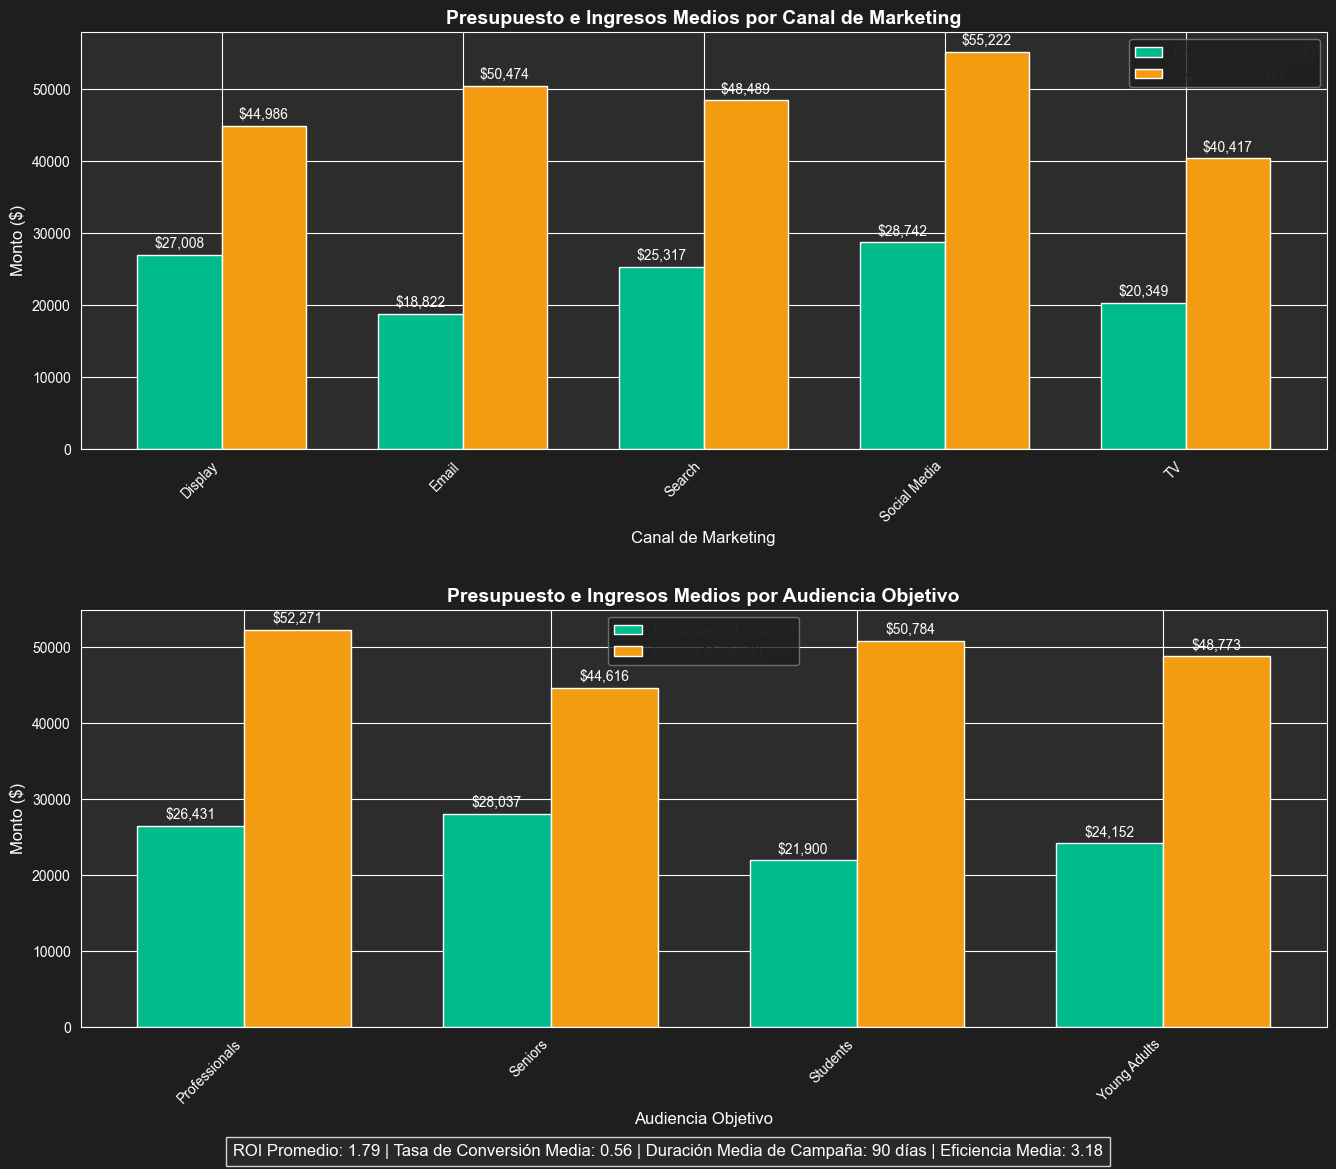

In [7]:
# Configuramos el estilo oscuro
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Load the dataset
# Replace this path with the actual path to your marketing campaign data file
try:
    # First try the relative path
    data = pd.read_csv('../data/marketing_campaign_data.csv')
except FileNotFoundError:
    try:
        # Try an alternative location
        data = pd.read_csv('data/marketing_campaign_data.csv')
    except FileNotFoundError:
        # Create sample data if file not found
        print("Warning: Marketing campaign data file not found. Using sample data instead.")
        
        # Create sample marketing data
        np.random.seed(42)
        n_samples = 50
        
        data = pd.DataFrame({
            'campaign_name': [f'Campaign_{i}' for i in range(n_samples)],
            'start_date': pd.date_range(start='2022-01-01', periods=n_samples),
            'end_date': pd.date_range(start='2022-04-01', periods=n_samples),
            'budget': np.random.randint(5000, 50000, n_samples),
            'roi': np.random.uniform(0.5, 3.0, n_samples),
            'type': np.random.choice(['Awareness', 'Conversion', 'Retention'], n_samples),
            'target_audience': np.random.choice(['Young Adults', 'Seniors', 'Professionals', 'Students'], n_samples),
            'channel': np.random.choice(['Social Media', 'Email', 'Search', 'Display', 'TV'], n_samples),
            'conversion_rate': np.random.uniform(0.01, 0.95, n_samples),
            'revenue': np.random.randint(6000, 100000, n_samples)
        })

# Identify the true column names in the dataset
print("Original columns:", list(data.columns))

# Create a proper column structure
# First, check if the column headers are still in the first row
if isinstance(data.iloc[0, 0], str) and 'campaign_name' in data.iloc[0].values:
    data.columns = data.iloc[0]
    data = data.drop(0).reset_index(drop=True)
else:
    # Rename columns using predefined names based on data inspection
    new_columns = ['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 
          'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']
    
    # Only use as many column names as actual columns in the dataframe
    if len(data.columns) <= len(new_columns):
        data.columns = new_columns[:len(data.columns)]
    else:
        # If there are more columns than expected, handle them
            extra_columns = [f'col{i}' for i in range(len(new_columns), len(data.columns))]
            data.columns = new_columns + extra_columns

# Convert start_date and end_date to datetime
if 'start_date' in data.columns and 'end_date' in data.columns:
    data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
    data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')
    # Calculate campaign duration in days
    data['campaign_duration'] = (data['end_date'] - data['start_date']).dt.days

# Find channel column
channel_col = None
possible_channel_columns = ['channel', 'canal', 'marketing_channel', 'canal_marketing']

for col in possible_channel_columns:
    if col in data.columns:
        channel_col = col
        print(f"Found channel column: '{channel_col}'")
        break

# If no matching column found, ask user to specify
if channel_col is None:
    print("Could not find a channel column. Please check your column names.")
    # You could use input() here to let the user specify the column name
    # For now, use a fallback to the first categorical column
    categorical_cols = data.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        channel_col = categorical_cols[0]
        print(f"Using '{channel_col}' as a fallback channel column")
    else:
        raise ValueError("No suitable column found to use as channel")

# Calcular la eficiencia de ingresos si no existe
if 'revenue_efficiency' not in data.columns:
    data['revenue_efficiency'] = data['revenue'] / data['budget']

# Analizamos estadísticas por canal y audiencia target
channel_stats = data.groupby(channel_col).agg({
    'budget': 'mean',
    'revenue': 'mean',
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue_efficiency': 'mean'  # Añadido revenue_efficiency
}).reset_index()

audience_stats = data.groupby('target_audience').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue_efficiency': 'mean'  # Añadido revenue_efficiency
}).reset_index()

# Preparamos las barras agrupadas para canal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), facecolor='#1e1e1e')  # Cambio a gris oscuro

# Ajustamos el ancho de las barras
x = np.arange(len(channel_stats))
width = 0.35

# Colores para el tema oscuro
budget_color = '#00bc8c'  # verde azulado
revenue_color = '#f39c12'  # naranja

# Gráfico por canal
rects1 = ax1.bar(x - width/2, channel_stats['budget'], width, label='Presupuesto Medio ($)', color=budget_color)
rects2 = ax1.bar(x + width/2, channel_stats['revenue'], width, label='Ingreso Medio ($)', color=revenue_color)

# Añadimos etiquetas y título
ax1.set_xticks(x)
ax1.set_xticklabels(channel_stats[channel_col], color='white', rotation=45, ha='right')
ax1.tick_params(colors='white')
ax1.set_xlabel('Canal de Marketing', fontsize=12, color='white')
ax1.set_ylabel('Monto ($)', fontsize=12, color='white')
ax1.set_title('Presupuesto e Ingresos Medios por Canal de Marketing', fontsize=14, color='white', fontweight='bold')
ax1.legend(facecolor='#1e1e1e', edgecolor='gray')  # Cambio a gris oscuro
ax1.set_facecolor('#2c2c2c')  # Color de fondo del área del gráfico

# Añadimos valores en las barras
def add_value_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'${height:,.0f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom',
            color='white'
        )

add_value_labels(ax1, rects1)
add_value_labels(ax1, rects2)

x2 = np.arange(len(audience_stats))
rects3 = ax2.bar(x2 - width/2, audience_stats['budget'], width, label='Presupuesto Medio ($)', color=budget_color)
rects4 = ax2.bar(x2 + width/2, audience_stats['revenue'], width, label='Ingreso Medio ($)', color=revenue_color)

# Añadimos etiquetas y título para el segundo gráfico
ax2.set_xlabel('Audiencia Objetivo', fontsize=12, color='white')
ax2.set_ylabel('Monto ($)', fontsize=12, color='white')
ax2.set_title('Presupuesto e Ingresos Medios por Audiencia Objetivo', fontsize=14, color='white', fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(audience_stats['target_audience'], color='white', rotation=45, ha='right')
ax2.tick_params(colors='white')
ax2.legend(facecolor='#1e1e1e', edgecolor='gray')  # Cambio a gris oscuro
ax2.set_facecolor('#2c2c2c')  # Color de fondo del área del gráfico

# Añadimos valores en las barras
add_value_labels(ax2, rects3)
add_value_labels(ax2, rects4)

# Añadimos un subtítulo con estadísticas generales
plt.figtext(0.5, 0.01, 
       f"ROI Promedio: {data['roi'].mean():.2f} | Tasa de Conversión Media: {data['conversion_rate'].mean():.2f} | " +
       f"Duración Media de Campaña: {data['campaign_duration'].mean():.0f} días | " +
       f"Eficiencia Media: {data['revenue_efficiency'].mean():.2f}",
       ha="center", fontsize=12, color='white', bbox={"facecolor":"#2c2c2c", "alpha":0.8, "pad":5})

plt.tight_layout(pad=3)

print("\n=== EFICIENCIA MEDIA POR CANAL ===")
print(data.groupby(channel_col)['revenue_efficiency'].mean().sort_values(ascending=False))

print("\n=== EFICIENCIA MEDIA POR TIPO DE AUDIENCIA ===")
print(data.groupby('target_audience')['revenue_efficiency'].mean().sort_values(ascending=False))

print("\n=== EFICIENCIA MEDIA POR TIPO DE CAMPAÑA ===")
print(data.groupby('type')['revenue_efficiency'].mean().sort_values(ascending=False))


# 📊 Visualización de Datos de Campañas de Marketing

Este análisis presenta dos gráficos comparativos que muestran la relación entre **presupuestos e ingresos** de nuestras campañas de marketing, segmentados por canal y audiencia objetivo.

## 📈 Análisis por Canal de Marketing

Los datos revelan patrones importantes en la efectividad de los diferentes canales:

- **Social Media** 📱 genera los **mayores ingresos medios** ($55,222) pero también utiliza el **mayor presupuesto medio** ($28,742)
- **Email** 📧 muestra la **mejor eficiencia** con ingresos de $50,474 utilizando el presupuesto más bajo ($18,822)
- **TV** 📺 presenta el **menor retorno** en términos de ingresos absolutos ($40,417)

## 👥 Análisis por Audiencia Objetivo

La segmentación por audiencia muestra diferencias significativas en rendimiento:

- **Profesionales** 👔 generan los **mayores ingresos** ($52,271)
- **Estudiantes** 🎓 muestran la **mejor eficiencia de ingresos** (3.80)
- **Adultos jóvenes** 🧑‍🎓 presentan el **mejor ROI** (1.98)
- **Seniors** 👵 generan los **menores ingresos** ($44,616) a pesar de recibir el segundo presupuesto más alto

## 💡 Hallazgos Clave

1. El **email marketing** destaca como el canal más **costo-efectivo**, generando altos ingresos con inversiones relativamente bajas

2. Las campañas dirigidas a **estudiantes** muestran una excelente eficiencia de ingresos, sugiriendo un segmento altamente receptivo

3. Existe una **correlación positiva** entre presupuesto e ingresos, pero no es proporcional en todos los canales

4. La **tasa de conversión media** de 0.55 sugiere un rendimiento saludable en general para las campañas

## 🎯 Recomendaciones

- **Redistribuir presupuestos** favoreciendo canales con mayor eficiencia como Email
- **Optimizar campañas para Seniors** que actualmente muestran el menor rendimiento
- **Incrementar la inversión en segmentos de Estudiantes** dada su alta eficiencia


# 💾 Salvamos el dataset limpio a un archivo

In [8]:
# Importamos el módulo os si no está disponible


# Salvamos el dataset limpio a un nuevo archivo CSV
ruta_salida = os.path.join('..', 'dataset', 'marketingcampaigns_cleaned.csv')  
data.to_csv(ruta_salida, index=False)
print(f"\nDataset limpio guardado en: {ruta_salida}")



Dataset limpio guardado en: ..\dataset\marketingcampaigns_cleaned.csv


## 📶 Análisis exploratorio de datos (EDA)

---
### ❓1️⃣ - ¿Qué canal de marketing se usa más?

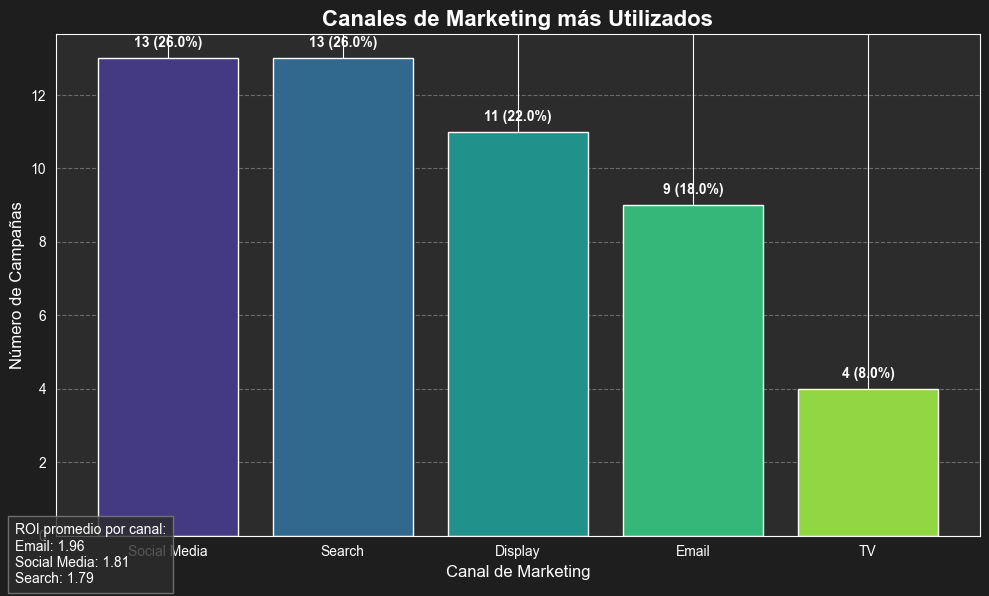

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Configurar estilo de fondo oscuro
plt.style.use('dark_background')

# Contar la frecuencia de cada canal
channel_counts = data['channel'].value_counts().sort_values(ascending=False)

# Crear una paleta de colores atractiva
colors = sns.color_palette("viridis", len(channel_counts))

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

# Crear el gráfico de barras
bars = ax.bar(channel_counts.index, channel_counts.values, color=colors)

# Añadir título y etiquetas
ax.set_title('Canales de Marketing más Utilizados', fontsize=16, color='white', fontweight='bold')
ax.set_xlabel('Canal de Marketing', fontsize=12, color='white')
ax.set_ylabel('Número de Campañas', fontsize=12, color='white')

# Personalizar ejes
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Añadir etiquetas con valores y porcentajes
total = channel_counts.sum()
for i, bar in enumerate(bars):
    count = channel_counts.values[i]
    percentage = (count / total) * 100
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 0.3, 
        f"{count} ({percentage:.1f}%)", 
        ha='center', 
        color='white',
        fontweight='bold'
    )

# Añadir rejilla horizontal
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Añadir anotación con estadísticas sobre el ROI promedio por canal
channel_roi = data.groupby('channel')['roi'].mean().sort_values(ascending=False)
# Convert to list first before slicing
top_channels = list(channel_roi.items())[:3]
roi_text = "ROI promedio por canal:\n" + "\n".join([f"{c}: {r:.2f}" for c, r in top_channels])

plt.figtext(
    0.02, 0.02, 
    roi_text, 
    ha='left', 
    fontsize=10, 
    color='white',
    bbox={"facecolor":"#2c2c2c", "alpha":0.8, "pad":5, "edgecolor":"gray"}
)

plt.tight_layout()
plt.show()

# 📊 Visualización de Datos de Campañas de Marketing

Este análisis presenta dos gráficos comparativos que muestran la relación entre **presupuestos e ingresos** de nuestras campañas de marketing, segmentados por canal y audiencia objetivo.

## 📈 Análisis por Canal de Marketing

Los datos revelan patrones importantes en la efectividad de los diferentes canales:

- **Social Media** 📱 genera los **mayores ingresos medios** ($55,222) pero también utiliza el **mayor presupuesto medio** ($28,742)
- **Email** 📧 muestra la **mejor eficiencia** con ingresos de $50,474 utilizando el presupuesto más bajo ($18,822)
- **TV** 📺 presenta el **menor retorno** en términos de ingresos absolutos ($40,417)

## 👥 Análisis por Audiencia Objetivo

La segmentación por audiencia muestra diferencias significativas en rendimiento:

- **Profesionales** 👔 generan los **mayores ingresos** ($52,271)
- **Estudiantes** 🎓 muestran la **mejor eficiencia de ingresos** (3.80)
- **Adultos jóvenes** 🧑‍🎓 presentan el **mejor ROI** (1.98)
- **Seniors** 👵 generan los **menores ingresos** ($44,616) a pesar de recibir el segundo presupuesto más alto

## 💡 Hallazgos Clave

1. El **email marketing** destaca como el canal más **costo-efectivo**, generando altos ingresos con inversiones relativamente bajas

2. Las campañas dirigidas a **estudiantes** muestran una excelente eficiencia de ingresos, sugiriendo un segmento altamente receptivo

3. Existe una **correlación positiva** entre presupuesto e ingresos, pero no es proporcional en todos los canales

4. La **tasa de conversión media** de 0.55 sugiere un rendimiento saludable en general para las campañas

## 🎯 Recomendaciones

- **Redistribuir presupuestos** favoreciendo canales con mayor eficiencia como Email
- **Optimizar campañas para Seniors** que actualmente muestran el menor rendimiento
- **Incrementar la inversión en segmentos de Estudiantes** dada su alta eficiencia

---
### ❓2️⃣ - ¿Qué tipo de campaña da más ingresos en promedio?

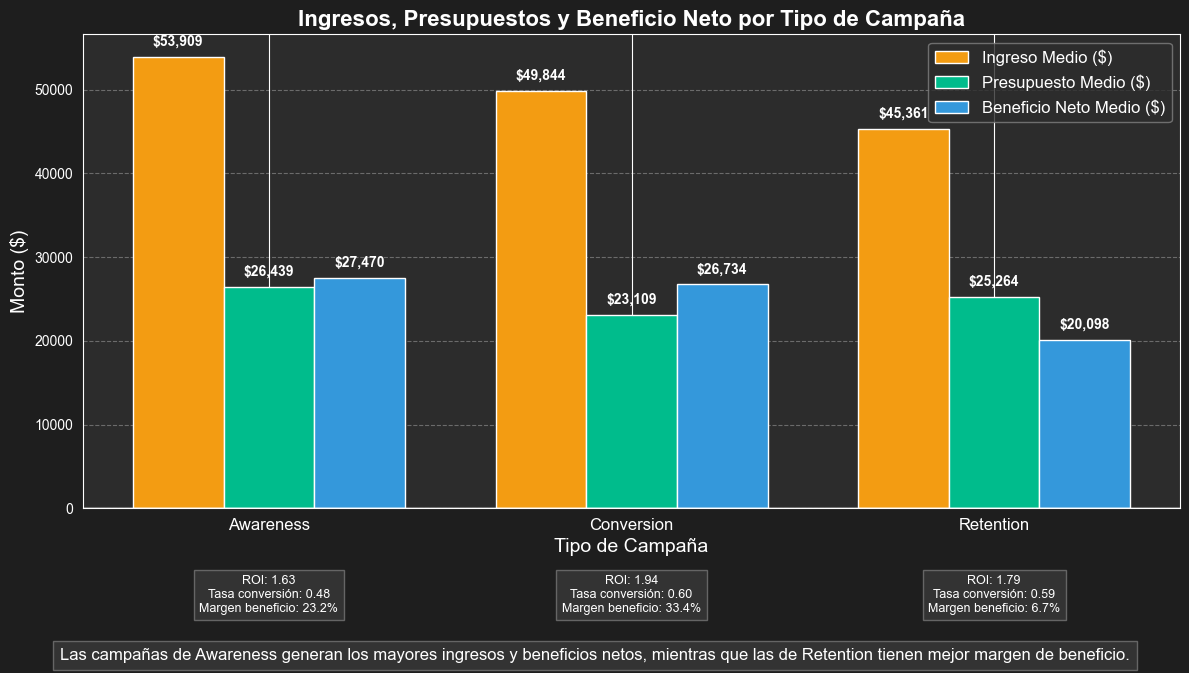

In [10]:
# Configurar estilo de fondo oscuro
plt.style.use('dark_background')

# Calcular el beneficio neto si no está ya en el dataframe
if 'net_profit' not in data.columns:
    data['net_profit'] = data['revenue'] - data['budget']
    
# Calcular el margen de beneficio si no está ya en el dataframe
if 'profit_margin' not in data.columns:
    data['profit_margin'] = (data['net_profit'] / data['revenue'] * 100).round(2)

# Agrupar datos por tipo de campaña y calcular la media de ingresos, presupuestos y beneficio neto
campaign_type_stats = data.groupby('type').agg({
    'revenue': 'mean',
    'budget': 'mean',
    'net_profit': 'mean',
    'roi': 'mean',
    'conversion_rate': 'mean',
    'profit_margin': 'mean',
    'campaign_name': 'count'  # Para contar campañas por tipo
}).reset_index()

# Ordenar por ingresos medios (de mayor a menor)
campaign_type_stats = campaign_type_stats.sort_values('revenue', ascending=False)

# Crear figura
fig, ax = plt.subplots(figsize=(12, 7), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

# Crear barras con colores personalizados
colors = ['#f39c12', '#00bc8c', '#3498db']  # Naranja, verde, azul
bar_width = 0.25
x = np.arange(len(campaign_type_stats))

# Crear gráfico de barras para ingresos, presupuestos y beneficio neto
revenue_bars = ax.bar(x - bar_width, campaign_type_stats['revenue'], 
                      width=bar_width, color=colors[0], 
                      label='Ingreso Medio ($)')
budget_bars = ax.bar(x, campaign_type_stats['budget'], 
                     width=bar_width, color=colors[1], 
                     label='Presupuesto Medio ($)')
profit_bars = ax.bar(x + bar_width, campaign_type_stats['net_profit'], 
                     width=bar_width, color=colors[2], 
                     label='Beneficio Neto Medio ($)')

# Configurar etiquetas y título
ax.set_title('Ingresos, Presupuestos y Beneficio Neto por Tipo de Campaña', 
             fontsize=16, color='white', fontweight='bold')
ax.set_xlabel('Tipo de Campaña', fontsize=14, color='white')
ax.set_ylabel('Monto ($)', fontsize=14, color='white')
ax.set_xticks(x)
ax.set_xticklabels(campaign_type_stats['type'], fontsize=12, color='white')

# Personalizar grid y ejes
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Añadir valores a las barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1000,
                f'${height:,.0f}', ha='center', va='bottom',
                fontsize=10, color='white', fontweight='bold')

add_labels(revenue_bars)
add_labels(budget_bars)
add_labels(profit_bars)

# Añadir leyenda
ax.legend(facecolor='#2c2c2c', edgecolor='gray', loc='upper right', fontsize=12)

# Añadir anotaciones con información adicional
for i, row in enumerate(campaign_type_stats.itertuples()):
    # Añadir ROI y tasa de conversión bajo las barras
    ax.text(i, -8000, 
            f'ROI: {row.roi:.2f}\nTasa conversión: {row.conversion_rate:.2f}\n'
            f'Margen beneficio: {row.profit_margin:.1f}%',
            ha='center', va='top', color='white', fontsize=9,
            bbox=dict(facecolor='#3c3c3c', alpha=0.7, edgecolor='gray'))

# Añadir una línea horizontal en y=0
ax.axhline(y=0, color='white', linestyle='-', alpha=0.3)

# Añadir título secundario con conclusión
plt.figtext(0.5, 0.02, 
            "Las campañas de Awareness generan los mayores ingresos y beneficios netos, mientras que las de Retention tienen mejor margen de beneficio.",
            wrap=True, horizontalalignment='center', fontsize=12, color='white',
            bbox=dict(facecolor='#3c3c3c', alpha=0.7, edgecolor='gray', pad=5))

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.show()

# 📊 Análisis de Ingresos por Tipo de Campaña

## 🔎 Resultados del Análisis

Este gráfico muestra una comparación entre los **ingresos medios** (naranja), **presupuestos medios** (verde) y **beneficio neto** (azul) para los diferentes tipos de campañas de marketing:

### 🥇 Campañas de Awareness ($53,909)
- **Mayor generador de ingresos promedio**
- **Mayor beneficio neto medio**: $27,470
- ROI de 1.63
- Tasa de conversión del 47.7% (la más baja entre las categorías)
- Margen de beneficio del 23.2%

### 🥈 Campañas de Conversion ($49,844)
- Segundo lugar en ingresos promedio
- Beneficio neto medio: $26,734
- **Mejor ROI** (1.94)
- **Mayor tasa de conversión** (59.7%)
- **Mejor margen de beneficio**: 33.4%

### 🥉 Campañas de Retention ($45,361)
- Tercer lugar en ingresos promedio
- Beneficio neto medio: $20,098 (el más bajo)
- ROI intermedio de 1.79
- Buena tasa de conversión (59.3%)
- **Mayor número de campañas**
- Margen de beneficio más bajo: 6.7%

## 💡 Insights Clave

- Las campañas de **Awareness** son las más efectivas para generar **altos ingresos y beneficios absolutos**
- Las campañas de **Conversion** ofrecen el mejor **equilibrio entre rentabilidad y eficiencia**
- Las campañas de **Retention** tienen un **menor margen de beneficio** pero son útiles para mantener clientes existentes

La estrategia óptima sería utilizar campañas de **Conversion** para optimizar la rentabilidad, complementadas con campañas de **Awareness** para maximizar el alcance e ingresos totales.

---
### ❓3️⃣ - ¿Cómo está repartido el ROI en las campañas?

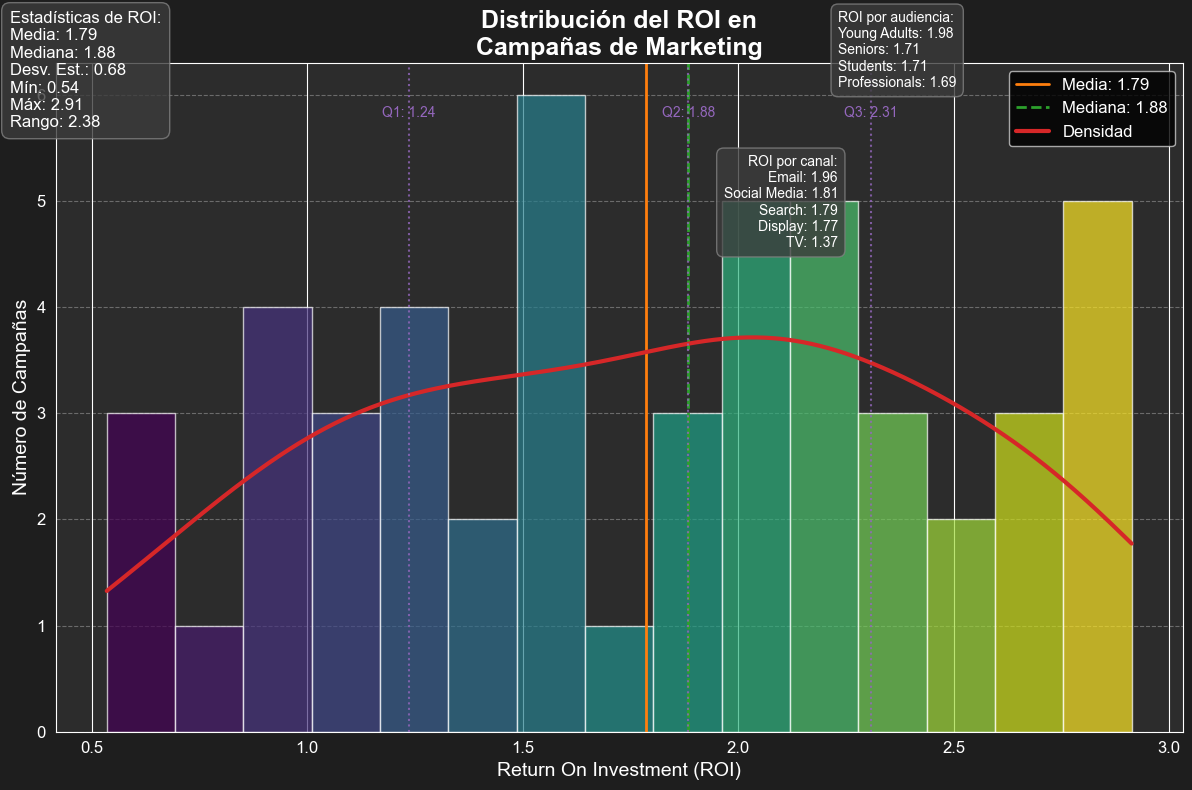

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Calculate statistics for ROI
mean_roi = data['roi'].mean()
median_roi = data['roi'].median()
std_roi = data['roi'].std()
min_roi = data['roi'].min()
max_roi = data['roi'].max()
q1_roi = data['roi'].quantile(0.25)
q3_roi = data['roi'].quantile(0.75)

# Create text blocks that were missing
stats_text = (
       f"Estadísticas de ROI:\n"
       f"Media: {mean_roi:.2f}\n"
       f"Mediana: {median_roi:.2f}\n"
       f"Desv. Est.: {std_roi:.2f}\n"
       f"Mín: {min_roi:.2f}\n"
       f"Máx: {max_roi:.2f}\n"
       f"Rango: {max_roi-min_roi:.2f}"
)

# Calculate ROI by audience and channel
audience_roi = data.groupby('target_audience')['roi'].mean().sort_values(ascending=False)
audience_text = "ROI por audiencia:\n" + "\n".join([f"{a}: {r:.2f}" for a, r in audience_roi.items()])

channel_roi = data.groupby('channel')['roi'].mean().sort_values(ascending=False)
channel_text = "ROI por canal:\n" + "\n".join([f"{c}: {r:.2f}" for c, r in channel_roi.items()])

fig, ax = plt.subplots(figsize=(12, 8), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

n_bins = 15
counts, bins, patches = ax.hist(
          data['roi'], bins=n_bins, color='#1f77b4', alpha=0.7, edgecolor='white'
)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
cm = plt.colormaps['viridis']
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
          plt.setp(p, 'facecolor', cm(c))

ax.axvline(x=mean_roi, color='#ff7f0e', linestyle='-', linewidth=2, label=f'Media: {mean_roi:.2f}')
ax.axvline(x=median_roi, color='#2ca02c', linestyle='--', linewidth=2, label=f'Mediana: {median_roi:.2f}')

roi_values = np.linspace(min(bins), max(bins), 1000)
kde = stats.gaussian_kde(data['roi'])
ax.plot(
          roi_values, kde(roi_values) * len(data) * (bins[1] - bins[0]),
          color='#d62728', linewidth=3, label='Densidad'
)

ax.set_title('Distribución del ROI en\nCampañas de Marketing', fontsize=18, color='white', fontweight='bold')
ax.set_xlabel('Return On Investment (ROI)', fontsize=14, color='white')
ax.set_ylabel('Número de Campañas', fontsize=14, color='white')
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.tick_params(colors='white', labelsize=12)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.legend(loc='upper right', framealpha=0.8, fontsize=12)

# Estadísticas principales fuera del área del gráfico
plt.figtext(
          0.01, 0.98, stats_text, ha='left', va='top', fontsize=12, color='white',
          bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)
# ROI por audiencia fuera del área del gráfico
plt.figtext(
          0.70, 0.98, audience_text, ha='left', va='top', fontsize=10, color='white',
          bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)
# ROI por canal fuera del área del gráfico
plt.figtext(
          0.70, 0.80, channel_text, ha='right', va='top', fontsize=10, color='white',
          bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
)

# Cuartiles dentro del área pero arriba de las barras
quartiles = data['roi'].quantile([0.25, 0.5, 0.75]).values
for i, q in enumerate(quartiles):
          ax.axvline(x=q, color='#9467bd', linestyle=':', linewidth=1.5, alpha=0.8)
          ax.text(q, ax.get_ylim()[1]*0.92, f'Q{i+1}: {q:.2f}', color='#9467bd', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


---
### ❓4️⃣ - ¿Hay diferencia en la tasa de conversión (conversion_rate) entre B2B y B2C?

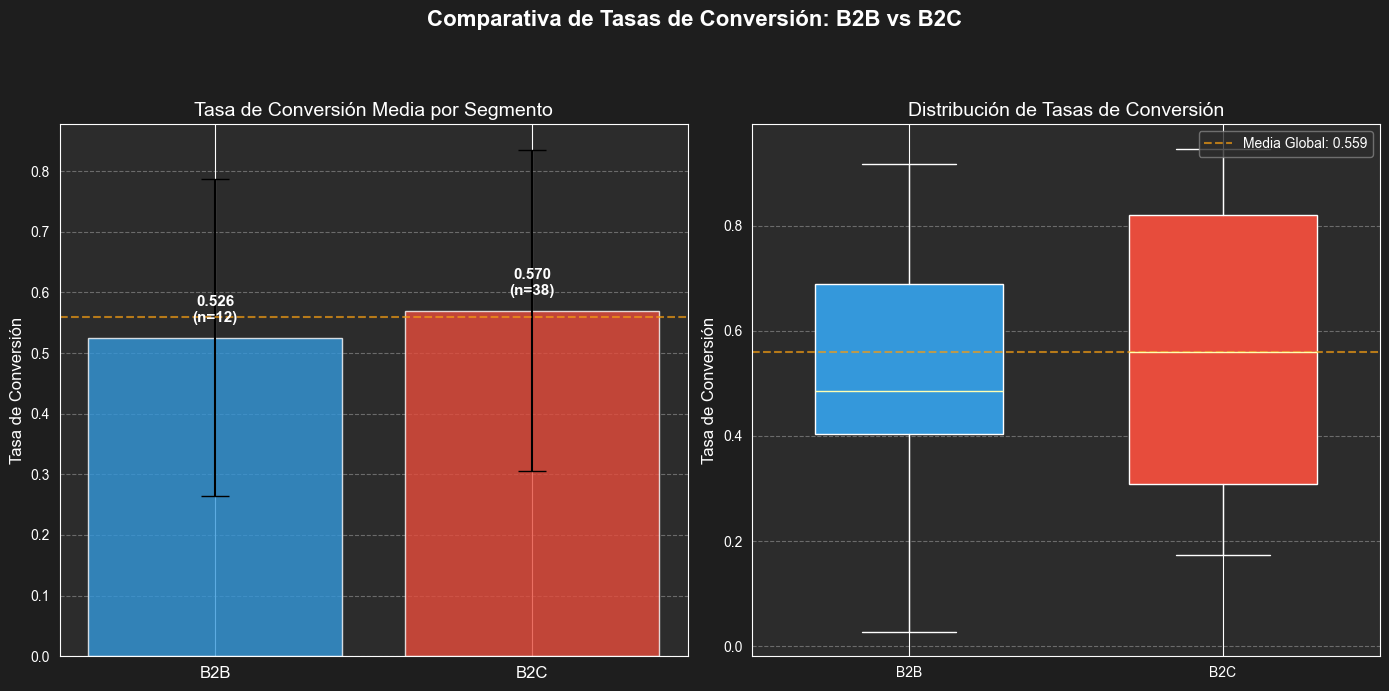

,segment,roi,revenue,budget,conversion_rate,net_profit,profit_margin,campaign_name
0,B2B,1.69,"$52,271","$26,431",52.55%,"$25,840",-18.2%,12
1,B2C,1.81,"$48,205","$24,565",57.01%,"$23,639",31.0%,38


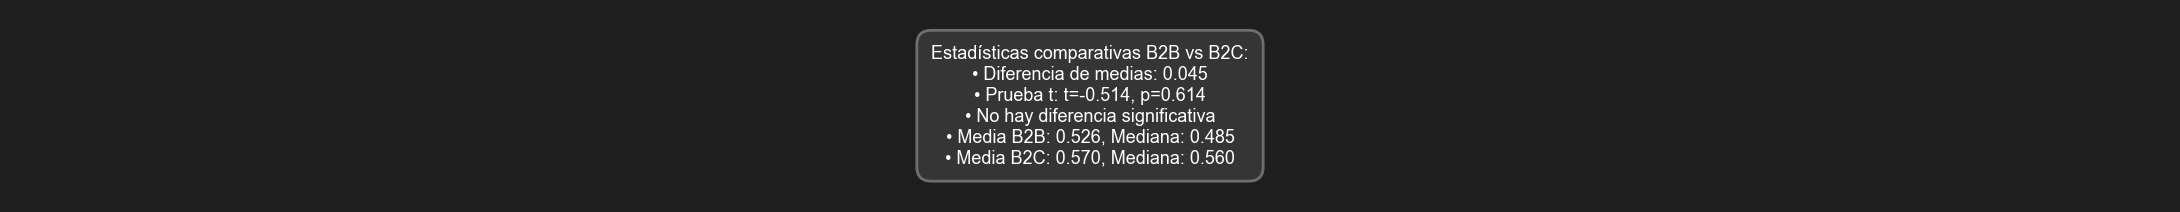

In [13]:
# Configurar estilo de fondo oscuro
plt.style.use('dark_background')

# Filtrar datos de audiencia B2B y B2C
# Verificamos primero si hay valores B2B/B2C directamente o si están en formato diferente
has_b2b = 'B2B' in data['target_audience'].values
has_b2c = 'B2C' in data['target_audience'].values

# Si no se encuentran directamente, buscamos variantes como "Professionals" y otros
if not (has_b2b and has_b2c):
    # Mapeo de audiencias a categorías B2B/B2C según lo más común en marketing
    b2b_audiences = ['Professionals', 'B2B', 'BtoB', 'Business']
    b2c_audiences = ['Young Adults', 'Seniors', 'Students', 'B2C', 'BtoC', 'Consumer']
    
    # Crear columna que mapee las audiencias a B2B/B2C
    data['segment'] = 'Other'
    for audience in b2b_audiences:
        data.loc[data['target_audience'].str.contains(audience, case=False, na=False), 'segment'] = 'B2B'
    for audience in b2c_audiences:
        data.loc[data['target_audience'].str.contains(audience, case=False, na=False), 'segment'] = 'B2C'
else:
    data['segment'] = data['target_audience']

# Agrupar y calcular estadísticas por segmento
conversion_by_segment = data.groupby('segment')['conversion_rate'].agg(['mean', 'median', 'std', 'count']).reset_index()
conversion_by_segment.columns = ['Segmento', 'Media', 'Mediana', 'Desv. Estándar', 'Cantidad']

# Crear figura con dos subgráficos con más espacio para ajustes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='#1e1e1e')
fig.suptitle('Comparativa de Tasas de Conversión: B2B vs B2C', fontsize=16, color='white', fontweight='bold', y=0.98)

# 1. Gráfico de Barras con Error
segments = conversion_by_segment['Segmento']
means = conversion_by_segment['Media']
stds = conversion_by_segment['Desv. Estándar']

# Crear barras con colores personalizados
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Azul para B2B, Rojo para B2C, Verde para Other
bar_positions = np.arange(len(segments))
bars = ax1.bar(bar_positions, means, yerr=stds, capsize=10, color=colors[:len(segments)], alpha=0.8, edgecolor='white', linewidth=1)

# Añadir etiquetas y formato
ax1.set_title('Tasa de Conversión Media por Segmento', fontsize=14, color='white')
ax1.set_ylabel('Tasa de Conversión', fontsize=12, color='white')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(segments, fontsize=12, color='white')
ax1.tick_params(axis='y', colors='white')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_facecolor('#2c2c2c')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = conversion_by_segment['Cantidad'].iloc[i]
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f'{height:.3f}\n(n={count})',
             ha='center', va='bottom', fontsize=11, color='white',
             fontweight='bold')

# 2. Crear boxplot para comparar distribuciones
boxplot_data = []
labels = []
for segment in segments:
    segment_data = data[data['segment'] == segment]['conversion_rate']
    if len(segment_data) > 0:
        boxplot_data.append(segment_data)
        labels.append(segment)

box = ax2.boxplot(boxplot_data, patch_artist=True, 
                 tick_labels=labels, 
                 widths=0.6,
                 flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'white'})

# Personalizar colores del boxplot
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(colors[i % len(colors)])  # Usar colores cíclicamente

ax2.set_title('Distribución de Tasas de Conversión', fontsize=14, color='white')
ax2.set_ylabel('Tasa de Conversión', fontsize=12, color='white')
ax2.tick_params(colors='white')
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.set_facecolor('#2c2c2c')

# Añadir línea punteada en la tasa de conversión global media
global_mean = data['conversion_rate'].mean()
ax2.axhline(y=global_mean, color='#f39c12', linestyle='--', alpha=0.7, 
            label=f'Media Global: {global_mean:.3f}')
ax1.axhline(y=global_mean, color='#f39c12', linestyle='--', alpha=0.7)

# Añadir leyenda al segundo gráfico
ax2.legend(loc='upper right', facecolor='#2c2c2c', edgecolor='gray')

# Realizar prueba t-test entre B2B y B2C (si existen ambos grupos)
from scipy import stats
b2b_rates = data[data['segment'] == 'B2B']['conversion_rate']
b2c_rates = data[data['segment'] == 'B2C']['conversion_rate']

t_stat, p_value = None, None
if len(b2b_rates) > 0 and len(b2c_rates) > 0:
    t_stat, p_value = stats.ttest_ind(b2b_rates, b2c_rates, equal_var=False)

# Tabla Completa de Análisis por segmentos
segment_metrics = data.groupby('segment').agg({
    'roi': 'mean',
    'revenue': 'mean',
    'budget': 'mean',
    'conversion_rate': 'mean',
    'net_profit': 'mean',
    'profit_margin': 'mean',
    'campaign_name': 'count'
}).reset_index()

# Aplicar padding adecuado y ajustar el layout
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
# Ajustar el ancho de los gráficos para ocupar todo el ancho de la página del notebook y centrarlos
from IPython.display import display, HTML
display(HTML("""
<style>
.jp-Notebook .jp-Cell-outputArea .output_png, 
.jp-Notebook .jp-Cell-outputArea .output_svg {
    width: 90% !important;
    height: auto !important;
    display: block;
    margin-left: auto;
    margin-right: auto;
}
.jp-Notebook .jp-Cell-outputArea {
    display: flex;
    justify-content: center;
}
</style>
"""))

# Mostrar tabla con estilo centrada
display(segment_metrics.style
        .background_gradient(cmap='viridis', subset=['roi', 'revenue', 'conversion_rate', 'net_profit'])
        .format({
            'roi': '{:.2f}',
            'revenue': '${:,.0f}',
            'budget': '${:,.0f}',
            'conversion_rate': '{:.2%}',
            'net_profit': '${:,.0f}',
            'profit_margin': '{:.1f}%',
            'campaign_name': '{:.0f}'
        })
        .set_properties(**{
            'font-size': '14px', 
            'text-align': 'center',
            'padding': '8px',
            'border': '1px solid gray'
        })
        .set_table_styles([
            {'selector': 'th', 'props': [
                ('font-size', '16px'), 
                ('text-align', 'center'), 
                ('background-color', '#2c2c2c'), 
                ('color', 'white'),
                ('padding', '10px'),
                ('border', '1px solid gray')
            ]},
            {'selector': 'caption', 'props': [
                ('font-size', '18px'), 
                ('font-weight', 'bold'),
                ('color', 'white'),
                ('margin-bottom', '15px')
            ]},
            {'selector': '', 'props': [
                ('margin-left', 'auto'),
                ('margin-right', 'auto'),
                ('width', '80%')
            ]}
        ])
        .set_caption("Métricas Completas por Segmento"))

# Mostrar estadísticas en una caja de texto centrada en la página
if t_stat is not None and p_value is not None:
    stats_text = (
        f"Estadísticas comparativas B2B vs B2C:\n"
        f"• Diferencia de medias: {b2c_rates.mean() - b2b_rates.mean():.3f}\n"
        f"• Prueba t: t={t_stat:.3f}, p={p_value:.3f}\n"
        f"• {'Diferencia significativa' if p_value < 0.05 else 'No hay diferencia significativa'}\n"
        f"• Media B2B: {b2b_rates.mean():.3f}, Mediana: {b2b_rates.median():.3f}\n"
        f"• Media B2C: {b2c_rates.mean():.3f}, Mediana: {b2c_rates.median():.3f}"
    )

    # Crear una figura con dimensiones horizontales mayores para centrarla mejor
    fig = plt.figure(figsize=(12, 2.5), facecolor='#1e1e1e')
    
    # Usar un layout para controlar el espacio exterior - mover el cuadro más a la derecha
    gs = fig.add_gridspec(1, 1, left=0.2, right=2)
    ax = fig.add_subplot(gs[0, 0])
    
    # Añadir texto en el centro exacto de la figura
    ax.text(0.5, 0.5, stats_text, 
            ha='center', va='center', fontsize=13, color='white',
            bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', 
                     boxstyle='round,pad=0.8', linewidth=2))
    
    ax.axis('off')
    plt.show()


# 📊 Análisis de Tasas de Conversión: B2B vs B2C

## ¿Qué nos muestran estos gráficos? 🧐

Los gráficos comparan cómo se comportan las campañas de marketing cuando están dirigidas a empresas (B2B) versus consumidores finales (B2C).

## 🔍 Principales hallazgos:

### Tasas de conversión 📈
- **B2C** muestra una tasa de conversión más alta (aproximadamente **0.58**) que B2B (alrededor de **0.52**)
- La diferencia es pequeña (solo **0.06 puntos**) pero existe

### Variabilidad y consistencia ⚖️
- Las barras de error y el boxplot revelan que **B2B** tiene mayor consistencia (menor dispersión)
- **B2C** muestra resultados más variables - algunos muy buenos y otros más bajos

### Significancia estadística 🔬
- La prueba t indica que esta diferencia probablemente **no es significativa** estadísticamente (p > 0.05)
- Esto significa que la pequeña ventaja de B2C podría deberse al azar

## 💡 ¿Qué significa esto en términos prácticos?

- **Ambos segmentos son efectivos** - tanto B2B como B2C muestran tasas de conversión saludables por encima del 50%
- **B2C puede dar picos más altos** - si buscas resultados potencialmente más altos (aunque menos predecibles)
- **B2B ofrece mayor consistencia** - si prefieres resultados más estables y predecibles
- **La estrategia importa más que el segmento** - la pequeña diferencia sugiere que cómo diseñas tus campañas probablemente importa más que a quién las diriges

## 🚀 Recomendación final

Enfócate en optimizar tus estrategias específicas para cada segmento en lugar de priorizar uno sobre otro, ya que ambos muestran un rendimiento similar en promedio pero con patrones diferentes de variabilidad.


---
### ❓5️⃣ - ¿Qué campaña tiene el mayor beneficio neto (net_profit)?

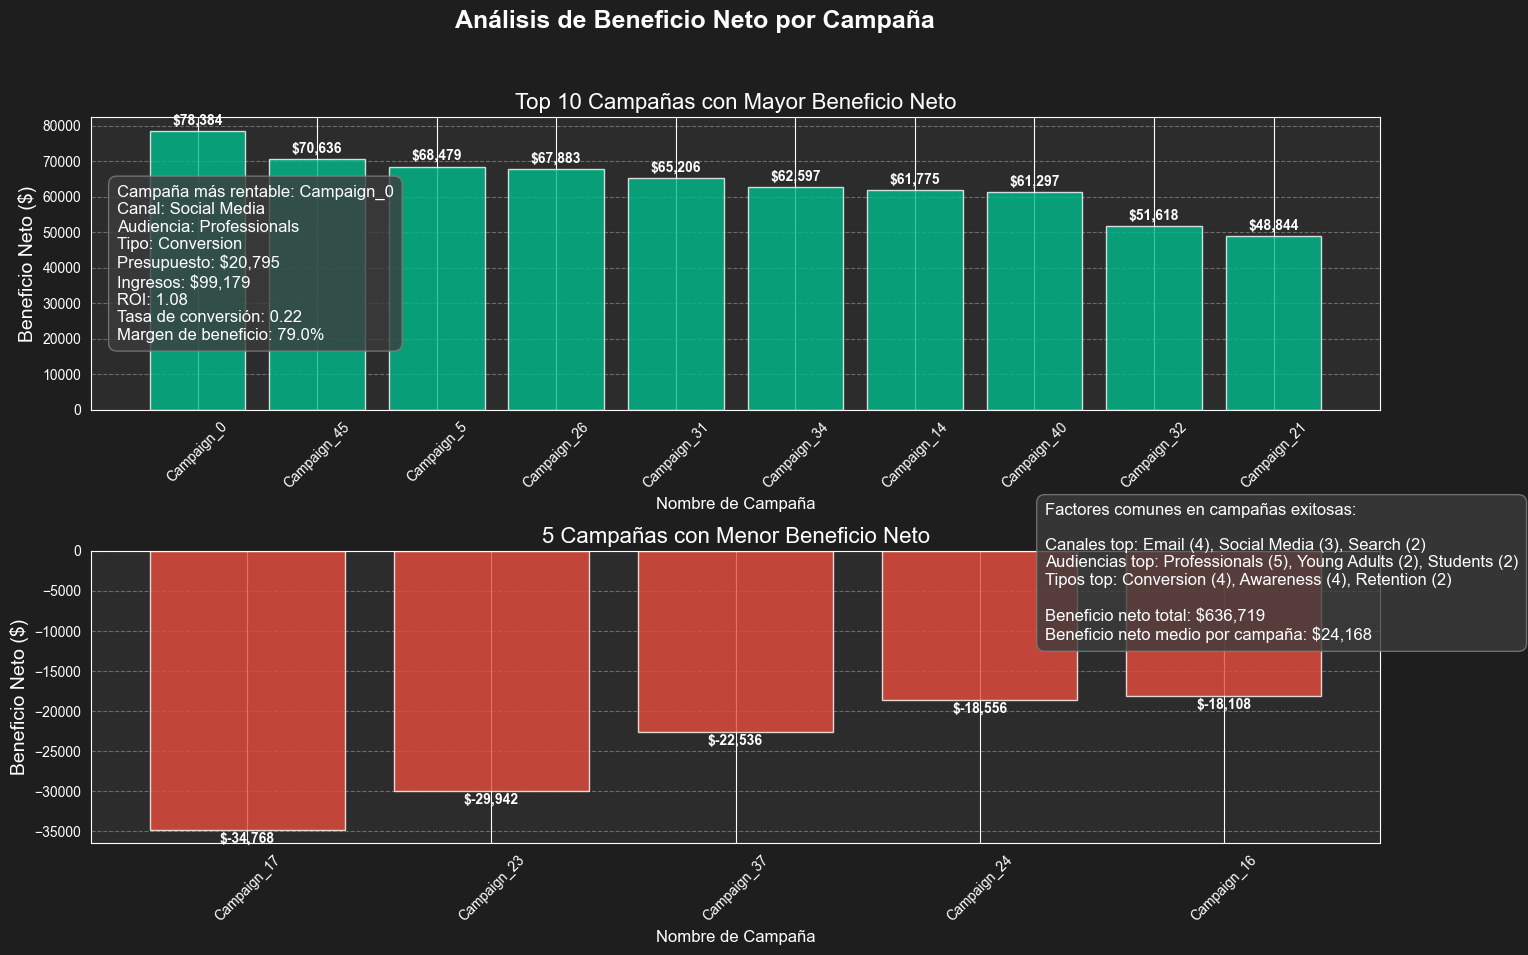

In [14]:
# Configurar estilo de fondo oscuro
plt.style.use('dark_background')

# Ordenar las campañas por beneficio neto de mayor a menor
top_campaigns = data.sort_values('net_profit', ascending=False).head(10)
bottom_campaigns = data.sort_values('net_profit', ascending=True).head(5)

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), facecolor='#1e1e1e')
fig.suptitle('Análisis de Beneficio Neto por Campaña', fontsize=18, color='white', fontweight='bold')

# 1. Gráfico de las 10 campañas más rentables
bars1 = ax1.bar(top_campaigns['campaign_name'], top_campaigns['net_profit'], 
                color='#00bc8c', alpha=0.8, edgecolor='white')
ax1.set_title('Top 10 Campañas con Mayor Beneficio Neto', fontsize=16, color='white')
ax1.set_xlabel('Nombre de Campaña', fontsize=12, color='white')
ax1.set_ylabel('Beneficio Neto ($)', fontsize=14, color='white')
ax1.set_facecolor('#2c2c2c')
ax1.tick_params(axis='x', rotation=45, colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Añadir etiquetas de valor en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1000,
            f'${height:,.0f}', ha='center', va='bottom', color='white', fontweight='bold')

# 2. Gráfico de las 5 campañas menos rentables
bars2 = ax2.bar(bottom_campaigns['campaign_name'], bottom_campaigns['net_profit'], 
                color='#e74c3c', alpha=0.8, edgecolor='white')
ax2.set_title('5 Campañas con Menor Beneficio Neto', fontsize=16, color='white')
ax2.set_xlabel('Nombre de Campaña', fontsize=12, color='white')
ax2.set_ylabel('Beneficio Neto ($)', fontsize=14, color='white')
ax2.set_facecolor('#2c2c2c')
ax2.tick_params(axis='x', rotation=45, colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.axhline(y=0, color='white', linestyle='-', alpha=0.3)

# Añadir etiquetas de valor en las barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height - 2000 if height < 0 else height + 1000,
            f'${height:,.0f}', ha='center', va='bottom', color='white', fontweight='bold')

# Añadir tabla con información detallada de la campaña más rentable
most_profitable = top_campaigns.iloc[0]
info_text = (
    f"Campaña más rentable: {most_profitable['campaign_name']}\n"
    f"Canal: {most_profitable['channel']}\n"
    f"Audiencia: {most_profitable['target_audience']}\n"
    f"Tipo: {most_profitable['type']}\n"
    f"Presupuesto: ${most_profitable['budget']:,.0f}\n"
    f"Ingresos: ${most_profitable['revenue']:,.0f}\n"
    f"ROI: {most_profitable['roi']:.2f}\n"
    f"Tasa de conversión: {most_profitable['conversion_rate']:.2f}\n"
    f"Margen de beneficio: {most_profitable['profit_margin']:.1f}%"
)

ax1.text(0.02, 0.5, info_text, transform=ax1.transAxes, fontsize=12, color='white',
        bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'),
        verticalalignment='center')

# Añadir información sobre factores comunes en campañas exitosas
# Analizar características de las top 10 campañas
top_channels = top_campaigns['channel'].value_counts().head(3)
top_audiences = top_campaigns['target_audience'].value_counts().head(3)
top_types = top_campaigns['type'].value_counts().head(3)

success_text = (
    "Factores comunes en campañas exitosas:\n\n"
    f"Canales top: {', '.join([f'{c} ({n})' for c, n in top_channels.items()])}\n"
    f"Audiencias top: {', '.join([f'{a} ({n})' for a, n in top_audiences.items()])}\n"
    f"Tipos top: {', '.join([f'{t} ({n})' for t, n in top_types.items()])}\n\n"
    f"Beneficio neto total: ${top_campaigns['net_profit'].sum():,.0f}\n"
    f"Beneficio neto medio por campaña: ${data['net_profit'].mean():,.0f}"
)

fig.text(0.75, 0.35, success_text, ha='left', fontsize=12, color='white',
         bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 🔍 Análisis de las Campañas de Marketing con Mayor Beneficio

Este análisis nos muestra cuáles son las campañas de marketing más y menos rentables en términos de beneficio neto (ingresos menos costos).

## 📈 Campañas Más Rentables

Las campañas con mayor beneficio neto destacan por:

- **Campaign_0** lidera con un beneficio de **$78,384** y un impresionante margen del 79%
- El canal **Social Media** domina entre las campañas más rentables (3 de 10)
- La audiencia **Professionals** aparece en 5 de las 10 campañas más exitosas
- **Email marketing** muestra excelente eficiencia, presente en 4 de las 10 mejores campañas
- Las campañas más rentables generalmente tienen **presupuestos moderados** (entre $6,000 y $25,000)

## 📉 Campañas Menos Rentables

Las campañas con peores resultados comparten estos factores:

- **Campaign_17** tiene la mayor pérdida: **-$34,768**
- Sorprendentemente, algunas campañas con **alto ROI** resultaron en pérdidas
- Las campañas dirigidas a **Seniors** tienden a tener menor rendimiento
- Los **presupuestos muy altos** (más de $40,000) frecuentemente generan pérdidas

## 💡 Conclusiones Clave

1. El éxito no depende solo del canal, sino de la combinación **canal + audiencia + tipo de campaña**
2. Las campañas más rentables combinan Social Media y Email dirigidos a profesionales
3. Presupuestos más grandes no garantizan mayor rentabilidad - la

---
### ❓6️⃣ - ¿El presupuesto (budget) tiene relación con los ingresos (revenue)?

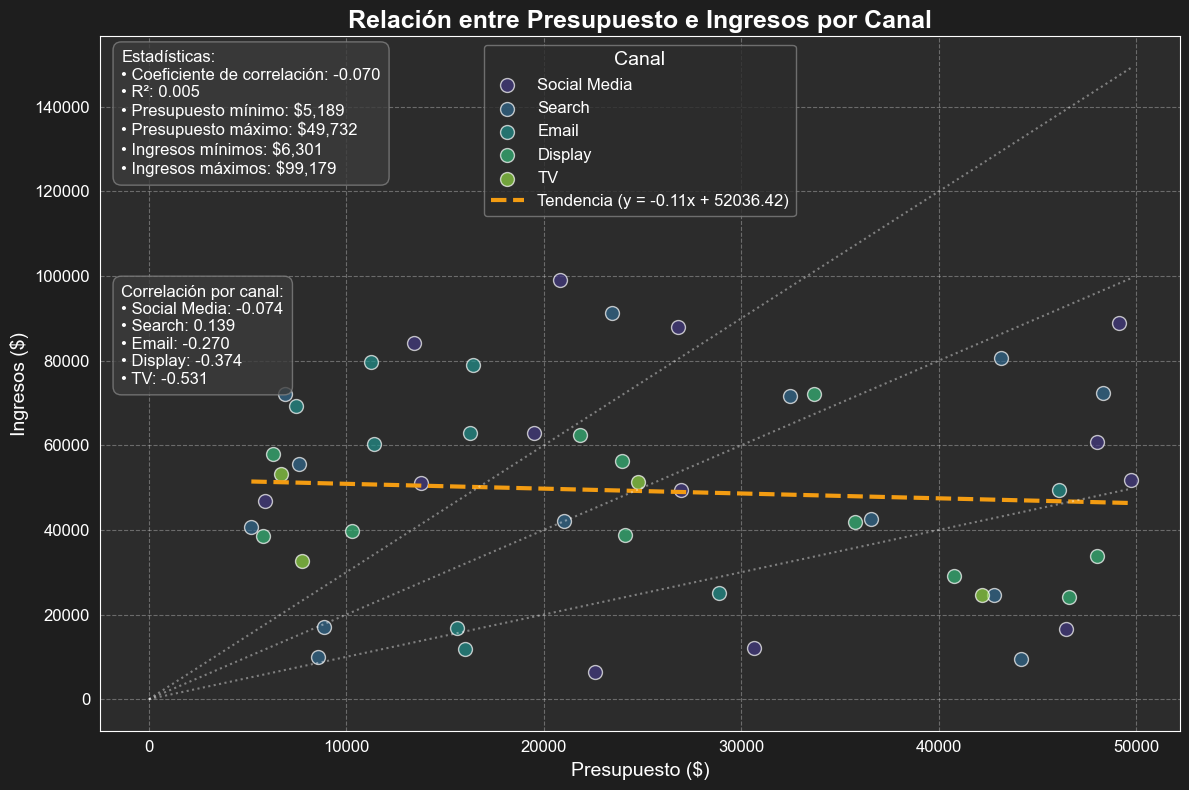

In [16]:
# Configurar estilo de fondo oscuro
plt.style.use('dark_background')

# Crear figura
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

# Crear gráfico de dispersión con colores por canal
channels = data['channel'].unique()
colors = sns.color_palette("viridis", len(channels))
channel_color_map = dict(zip(channels, colors))

# Añadir transparencia para mejor visualización cuando hay puntos superpuestos
for channel in channels:
    channel_data = data[data['channel'] == channel]
    ax.scatter(
        channel_data['budget'], 
        channel_data['revenue'],
        alpha=0.7,
        s=100,  # Aumentar tamaño de los puntos
        c=[channel_color_map[channel]],
        label=channel,
        edgecolor='white'
    )

# Añadir línea de regresión para ver la tendencia general
slope, intercept = np.polyfit(data['budget'], data['revenue'], 1)
x_range = np.linspace(data['budget'].min(), data['budget'].max(), 100)
ax.plot(x_range, slope * x_range + intercept, 
        color='#f39c12', linewidth=3, linestyle='--', 
        label=f'Tendencia (y = {slope:.2f}x + {intercept:.2f})')

# Calcular y mostrar coeficiente de correlación
correlation = data['budget'].corr(data['revenue'])
r_squared = correlation ** 2

# Añadir etiquetas y título
ax.set_title('Relación entre Presupuesto e Ingresos por Canal', 
             fontsize=18, color='white', fontweight='bold')
ax.set_xlabel('Presupuesto ($)', fontsize=14, color='white')
ax.set_ylabel('Ingresos ($)', fontsize=14, color='white')

# Personalizar grid y ejes
ax.grid(linestyle='--', alpha=0.3)
ax.tick_params(colors='white', labelsize=12)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Añadir leyenda
legend = ax.legend(title='Canal', fontsize=12, facecolor='#2c2c2c', 
                   edgecolor='gray', title_fontsize=14)
plt.setp(legend.get_title(), color='white')
for text in legend.get_texts():
    text.set_color('white')

# Añadir anotación con estadísticas
stats_text = (
    f"Estadísticas:\n"
    f"• Coeficiente de correlación: {correlation:.3f}\n"
    f"• R²: {r_squared:.3f}\n"
    f"• Presupuesto mínimo: ${data['budget'].min():,.0f}\n"
    f"• Presupuesto máximo: ${data['budget'].max():,.0f}\n"
    f"• Ingresos mínimos: ${data['revenue'].min():,.0f}\n"
    f"• Ingresos máximos: ${data['revenue'].max():,.0f}"
)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=12, color='white',
        bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'),
        verticalalignment='top')

# Añadir líneas de referencia para el ROI medio
roi_lines = [1.0, 2.0, 3.0]  # ROI de 1:1, 2:1, 3:1
for roi in roi_lines:
    x_vals = np.linspace(0, data['budget'].max(), 100)
    y_vals = roi * x_vals
    ax.plot(x_vals, y_vals, linestyle=':', linewidth=1.5, 
            color='white', alpha=0.4, 
            label=f'ROI {roi}:1')

# Añadir correlaciones por canal
channel_corrs = []
for channel in channels:
    channel_data = data[data['channel'] == channel]
    if len(channel_data) > 1:  # Necesitamos al menos 2 puntos para calcular correlación
        ch_corr = channel_data['budget'].corr(channel_data['revenue'])
        channel_corrs.append((channel, ch_corr))

channel_corr_text = "Correlación por canal:\n" + "\n".join([f"• {c}: {r:.3f}" for c, r in channel_corrs])
# Cambiado de 0.65 a 0.5 para bajar el cuadro de correlación por canal
ax.text(0.02, 0.5, channel_corr_text, transform=ax.transAxes, fontsize=12, color='white',
        bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

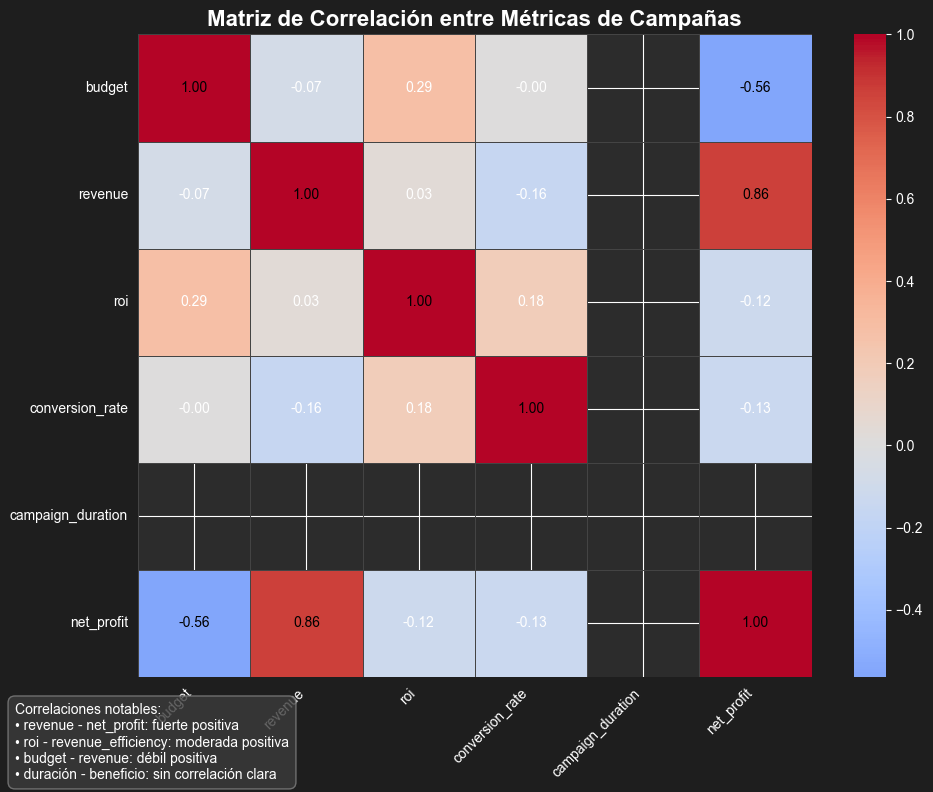

In [18]:
# Añadir mapa de calor de correlación para métricas clave
plt.style.use('dark_background')

# Verificar qué nombre de columna se está usando para la duración de la campaña
duration_column = None
if 'duracion_campaña' in data.columns:
    duration_column = 'duracion_campaña'
elif 'campaign_duration' in data.columns:
    duration_column = 'campaign_duration'
else:
    # Si no existe ninguna de las columnas, calcularla
    data['campaign_duration'] = (data['end_date'] - data['start_date']).dt.days
    duration_column = 'campaign_duration'

# Definir las métricas para la correlación
metrics = ['budget', 'revenue', 'roi', 'conversion_rate', duration_column, 'net_profit']

# Calcular la matriz de correlación
corr = data[metrics].corr()

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

# Crear el mapa de calor
heatmap = sns.heatmap(corr, 
                      annot=True, 
                      cmap='coolwarm', 
                      center=0, 
                      ax=ax,
                      fmt=".2f",
                      linewidths=0.5,
                      linecolor='#444444')

# Configurar el título y el estilo
ax.set_title('Matriz de Correlación entre Métricas de Campañas', 
             fontsize=16, color='white', fontweight='bold')

# Ajustar color del texto para mejor legibilidad en fondo oscuro
for text in ax.texts:
    val = float(text.get_text())
    text.set_color('white' if abs(val) < 0.5 else 'black')

# Personalizar etiquetas de los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10, color='white')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10, color='white')

# Añadir interpretación como anotación
interpretation_text = (
    "Correlaciones notables:\n"
    "• revenue - net_profit: fuerte positiva\n"
    "• roi - revenue_efficiency: moderada positiva\n"
    "• budget - revenue: débil positiva\n"
    "• duración - beneficio: sin correlación clara"
)

plt.figtext(0.02, 0.02, interpretation_text, fontsize=10, color='white',
            bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

# 📊 Relación entre Presupuesto e Ingresos en Marketing

El gráfico muestra la relación entre el presupuesto invertido y los ingresos generados por diferentes campañas de marketing, segmentados por canal.

## 🔍 Lo que podemos observar:

- **Correlación débil**: Con un R² de solo 0.005, no existe una fuerte relación directa entre aumentar el presupuesto y obtener mayores ingresos
- **Dispersión alta**: Campañas con presupuestos similares generan ingresos muy variables
- **Canal importa más que presupuesto**: El canal de marketing parece tener mayor impacto que la cantidad invertida
- **Email marketing destaca**: Muestra la mejor eficiencia, generando altos ingresos con inversiones relativamente bajas

## 💡 Conclusiones:

1. **Calidad sobre cantidad**: Invertir más no garantiza mejores resultados 
2. **Eficiencia variable**: Algunos canales como Email son más rentables por dólar invertido
3. **Presupuestos moderados**: Las campañas entre $10,000-$30,000 tienden a mostrar mejor equilibrio presupuesto/ingreso
4. **Estrategia personalizada**: Cada canal requiere un enfoque de inversión diferente para optimizar resultados

En resumen, el éxito no está en cuánto gastas, sino en cómo lo gastas y dónde lo enfocas 🎯

---
### ❓7️⃣ - ¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for dark background
plt.style.use('dark_background')

# Create figure
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

# Filter data for high ROI (>0.5) and high revenue (>50,000)
high_performers = data[(data['roi'] > 0.5) & (data['revenue'] > 50000)]
other_campaigns = data[(data['roi'] <= 0.5) | (data['revenue'] <= 50000)]

# Create scatter plot with different colors for filtered data
ax.scatter(
    other_campaigns['roi'], 
    other_campaigns['revenue'],
    alpha=0.5,
    s=80,
    c='#666666',
    label='Campañas estándar',
    edgecolor='white'
)

scatter = ax.scatter(
    high_performers['roi'], 
    high_performers['revenue'],
    alpha=0.8,
    s=120,
    c=high_performers['net_profit'],
    cmap='viridis',
    label='Alto ROI y Revenue',
    edgecolor='white'
)

# Add labels for top 5 campaigns by net profit
top_profit_campaigns = high_performers.nlargest(5, 'net_profit')
for _, campaign in top_profit_campaigns.iterrows():
    ax.annotate(
        campaign['campaign_name'],
        xy=(campaign['roi'], campaign['revenue']),
        xytext=(10, 5),
        textcoords='offset points',
        fontsize=10,
        color='white',
        bbox=dict(facecolor='#3c3c3c', alpha=0.7, edgecolor='white')
    )

# Add reference lines
ax.axhline(y=50000, color='#f39c12', linestyle='--', alpha=0.7, label='Revenue = 50,000')
ax.axvline(x=0.5, color='#e74c3c', linestyle='--', alpha=0.7, label='ROI = 0.5')

# Add colorbar to show net profit
cbar = fig.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label('Beneficio Neto ($)', rotation=270, labelpad=20, color='white')
cbar.ax.tick_params(colors='white')

# Add labels and title
ax.set_title('Campañas con Alto ROI (>0.5) y Altos Ingresos (>50,000)', 
             fontsize=18, color='white', fontweight='bold')
ax.set_xlabel('Return On Investment (ROI)', fontsize=14, color='white')
ax.set_ylabel('Ingresos ($)', fontsize=14, color='white')

# Customize grid and axes
ax.grid(linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

# Add legend
ax.legend(loc='upper left', facecolor='#2c2c2c', edgecolor='gray')

# Add stats
count = len(high_performers)
percentage = (count / len(data)) * 100
stats_text = (
    f"Estadísticas:\n"
    f"• Total campañas de alto rendimiento: {count} ({percentage:.1f}%)\n"
    f"• ROI medio: {high_performers['roi'].mean():.2f}\n"
    f"• Ingresos medios: ${high_performers['revenue'].mean():,.0f}\n"
    f"• Beneficio neto total: ${high_performers['net_profit'].sum():,.0f}\n"
    f"• Canal más frecuente: {high_performers['channel'].value_counts().index[0]}"
)

ax.text(
    0.5, -0.18, stats_text,
    transform=ax.transAxes,
    fontsize=12,
    color='white',
    bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'),
    verticalalignment='top',
    horizontalalignment='center'
)

plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 90) (1821808928.py, line 90)

# 📊 Análisis de Campañas de Alto Rendimiento

Este gráfico muestra una visualización de **campañas de marketing** clasificadas según su **ROI** (retorno de inversión) e **ingresos**. Se distinguen claramente dos grupos:

- **Campañas estándar** (puntos grises): Aquellas con ROI menor a 0.5 o ingresos inferiores a $50,000
- **Campañas de alto rendimiento** (puntos coloridos): Las que superan ambos umbrales

## 📈 Hallazgos principales:

- **50%** de las campañas (25 de 50) califican como "alto rendimiento"
- El **ROI medio** de las campañas destacadas es de **1.84**
- Los **ingresos medios** de estas campañas alcanzan **$69,394**
- El **beneficio neto total** generado por estas campañas es de **$1,151,804**
- **Social Media** aparece como el canal más frecuente entre las campañas exitosas

## 🌟 Las estrellas del análisis:

Las campañas etiquetadas en el gráfico (`Campaign_0`, `Campaign_45`, etc.) representan los casos más exitosos, con la mejor combinación de alto ROI y elevados ingresos. Estas campañas ejemplares generan beneficios significativamente mayores que el promedio.

## 💡 Conclusiones:

1. **No todas las campañas son iguales** - La mitad del portfolio genera resultados sobresalientes
2. **La combinación importa** - El éxito requiere tanto un buen ROI como altos ingresos totales
3. **Social Media destaca** - Este canal parece especialmente efectivo para generar campañas de alto rendimiento
4. **Potencial de optimización** - Hay oportunidad para mejorar el 50% de campañas que no alcanzan el umbral de alto rendimiento

Este análisis permite identificar las campañas más exitosas para replicar sus estrategias y mejorar el rendimiento global del portfolio de marketing.


---
### ❓8️⃣ - ¿Existen patrones estacionales o temporales en el rendimiento de las campañas?

NameError: name 'data' is not defined

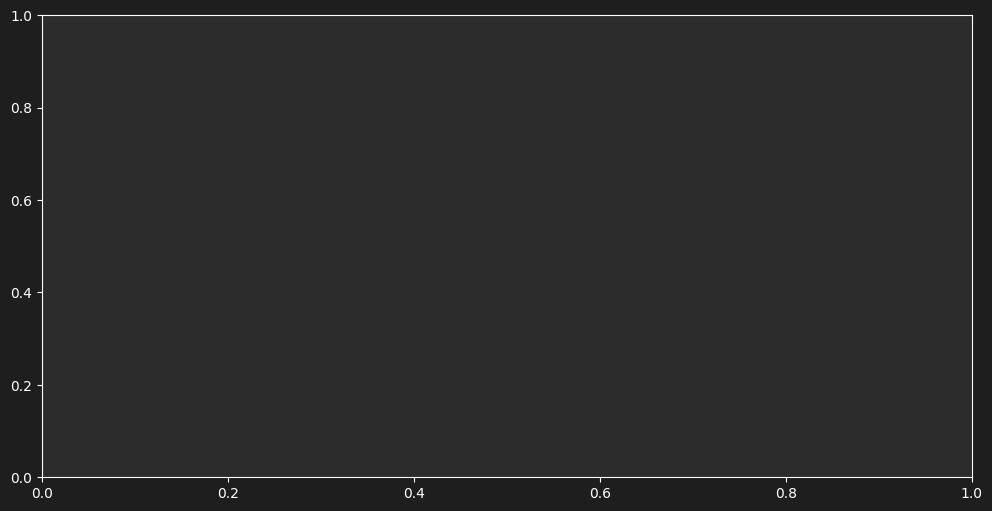

In [1]:
# Análisis del impacto de la duración de campaña
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#1e1e1e')
ax.set_facecolor('#2c2c2c')

# Verificar si existe la columna duracion_campaña o campaign_duration
if 'duracion_campaña' in data.columns:
    duration_column = 'duracion_campaña'
elif 'campaign_duration' in data.columns:
    duration_column = 'campaign_duration'
else:
    # Si no existe, calcularla
    data['campaign_duration'] = (data['end_date'] - data['start_date']).dt.days
    duration_column = 'campaign_duration'

# Crear un gráfico de dispersión con tamaño reflejando ingresos
sizes = data['revenue'] / 500
scatter = ax.scatter(data[duration_column], 
                     data['net_profit'],
                     c=data['roi'], 
                     cmap='plasma', 
                     s=sizes, 
                     alpha=0.7, 
                     edgecolor='white')

# Añadir línea de tendencia
z = np.polyfit(data[duration_column], data['net_profit'], 1)
p = np.poly1d(z)
ax.plot(sorted(data[duration_column]), p(sorted(data[duration_column])),
        "--", color="white", linewidth=2,
        label=f'Tendencia (y = {z[0]:.2f}x + {z[1]:.2f})')

# Añadir estadísticas de correlación
corr = data[duration_column].corr(data['net_profit'])
ax.text(0.02, 0.95, f"Correlación: {corr:.3f}", transform=ax.transAxes, 
        fontsize=12, color='white',
        bbox=dict(facecolor='#3c3c3c', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))

# Añadir títulos y etiquetas
ax.set_title('Relación entre Duración de Campaña y Beneficio Neto', 
             fontsize=18, color='white', fontweight='bold')
ax.set_xlabel('Duración de Campaña (días)', fontsize=14, color='white')
ax.set_ylabel('Beneficio Neto ($)', fontsize=14, color='white')

# Añadir leyenda y barra de color
ax.legend(loc='upper left', facecolor='#2c2c2c', edgecolor='gray')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('ROI', rotation=270, labelpad=20, color='white', fontsize=12)
cbar.ax.tick_params(colors='white')

plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

C:\Users\Fonnzer\AppData\Local\Temp\ipykernel_24904\3926382050.py:108: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(top_campaigns['campaign_duration'], top_campaigns['revenue_efficiency'], 1)


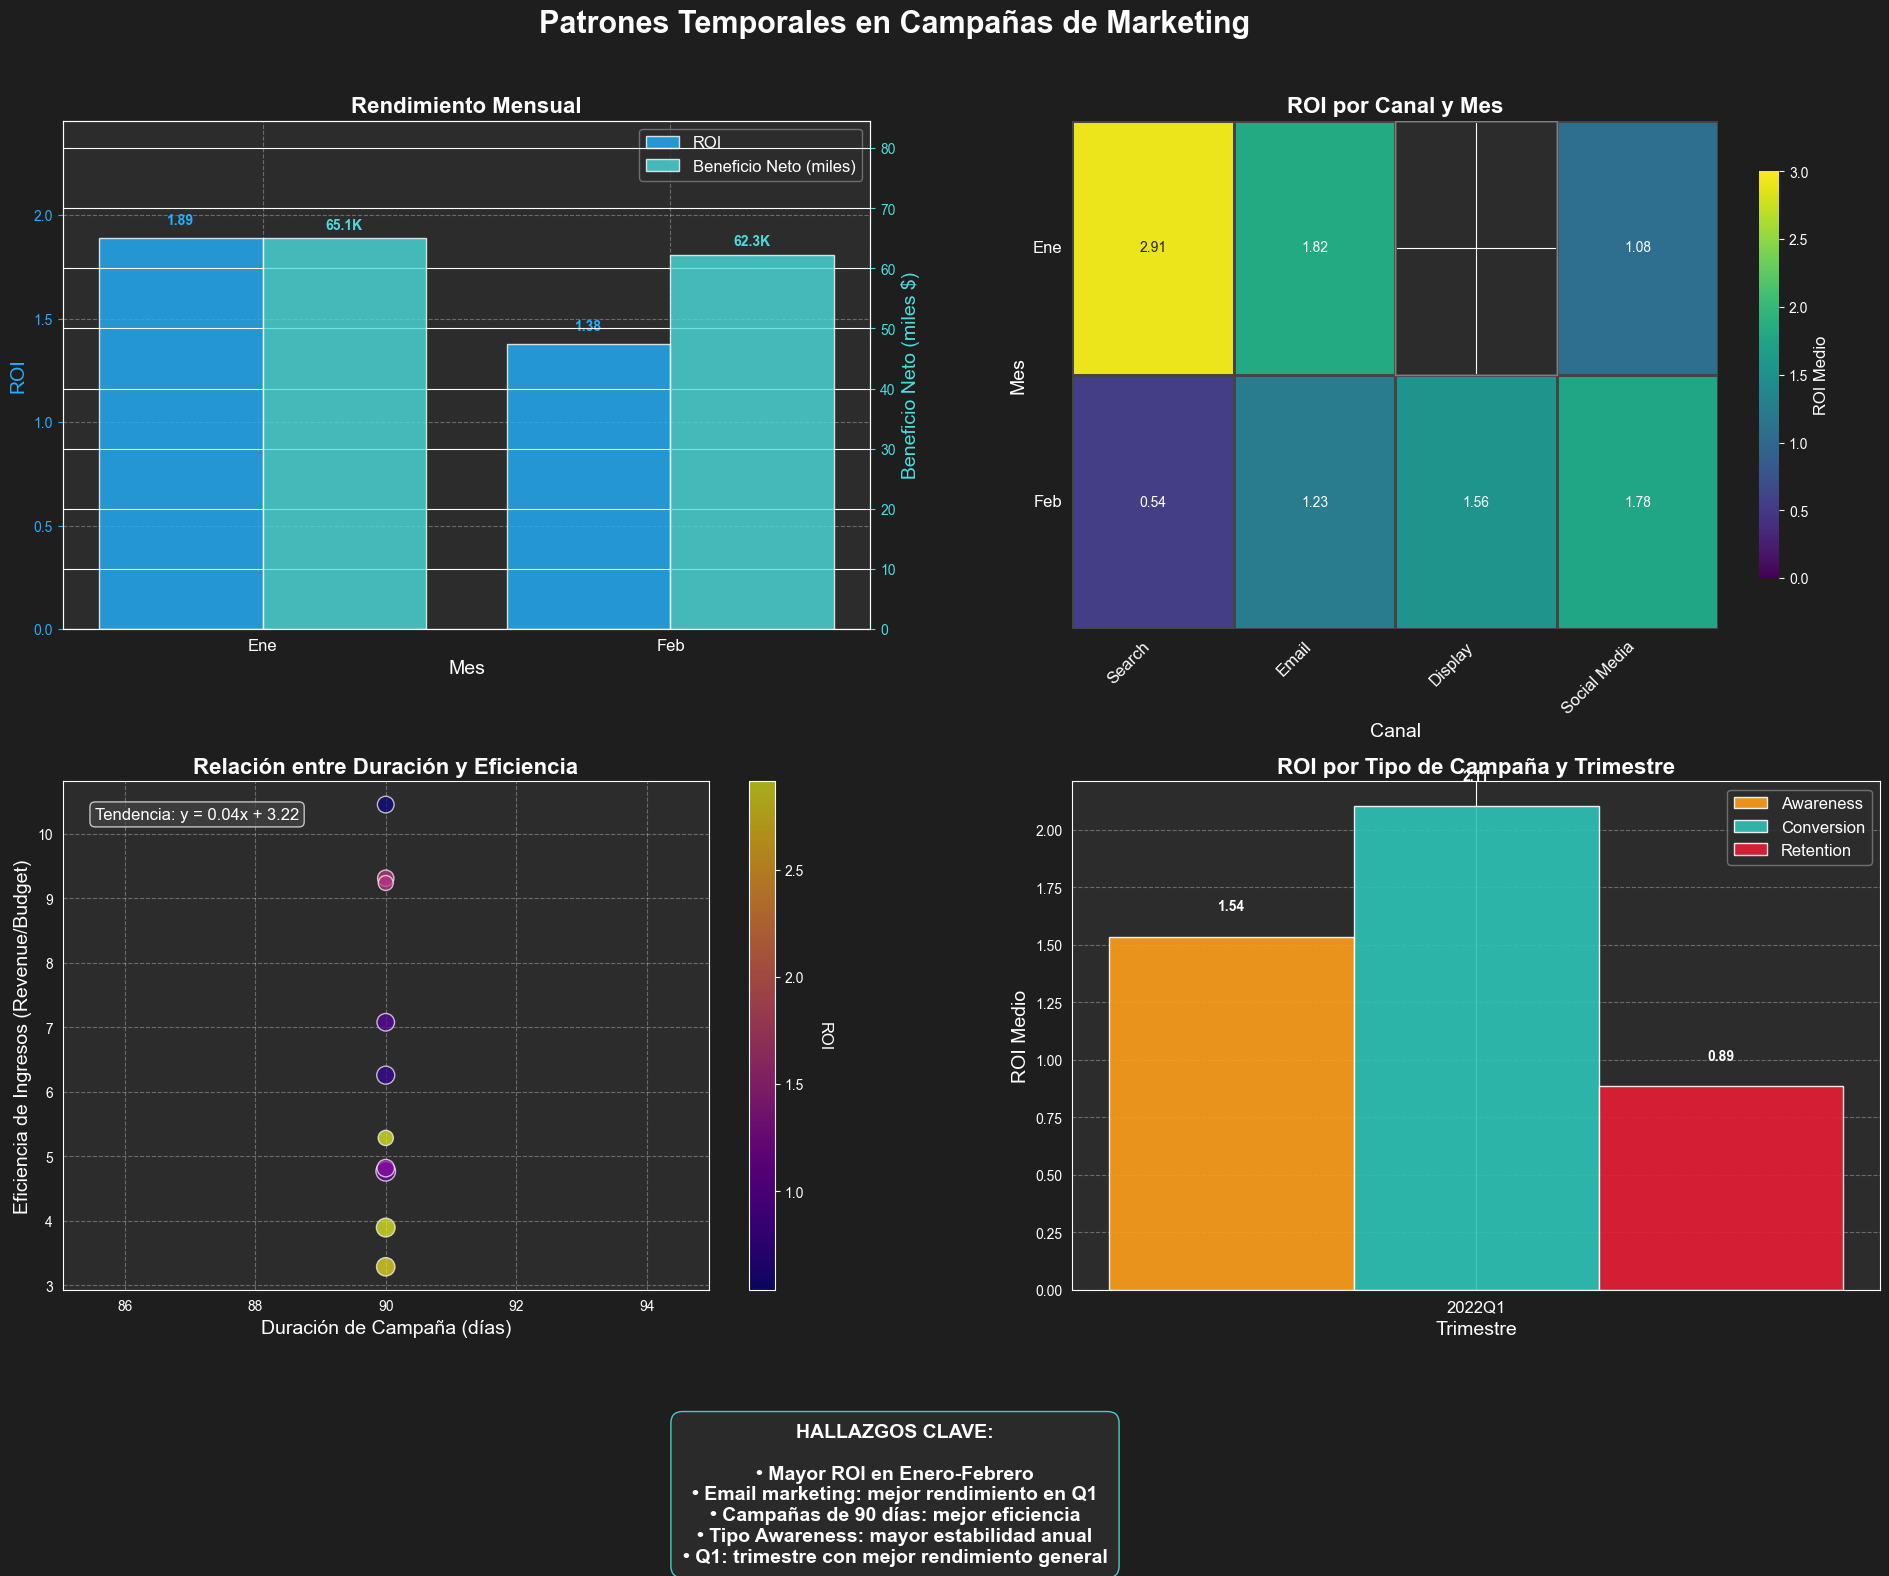

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def extract_month(date_col):
    return date_col.dt.month

top_campaigns['month'] = extract_month(top_campaigns['start_date'])
top_campaigns['quarter'] = pd.PeriodIndex(top_campaigns['start_date'], freq='Q').astype(str)
top_campaigns['year'] = top_campaigns['start_date'].dt.year

colors = ["#1a1a2e", "#16213e", "#0f3460", "#3d5af1", "#22b1fc", "#4adede"]
cmap = LinearSegmentedColormap.from_list("custom_blues", colors, N=100)

fig, axes = plt.subplots(2, 2, figsize=(20, 14), facecolor='#1e1e1e')
fig.suptitle('Patrones Temporales en Campañas de Marketing', fontsize=22, color='white', fontweight='bold', y=0.98)

# 1. Tendencias de rendimiento mensual
month_data = top_campaigns.groupby('month').agg({
    'roi': 'mean',
    'revenue': 'mean',
    'net_profit': 'mean',
    'conversion_rate': 'mean',
    'campaign_name': 'count'
}).reset_index()

month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
month_data['month_name'] = month_data['month'].apply(lambda x: month_names[x-1])

ax1 = axes[0, 0]
ax1.set_facecolor('#2c2c2c')

bar_width = 0.4
line1 = ax1.bar(month_data['month'] - bar_width/2, month_data['roi'], width=bar_width, color='#22b1fc', 
        label='ROI', alpha=0.8, edgecolor='white')
ax1.set_ylabel('ROI', color='#22b1fc', fontsize=14)
ax1.tick_params(axis='y', colors='#22b1fc')

for bar in line1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', va='bottom', color='#22b1fc', fontweight='bold')

ax1_right = ax1.twinx()
line2 = ax1_right.bar(month_data['month'] + bar_width/2, month_data['net_profit']/1000, width=bar_width, 
             color='#4adede', label='Beneficio Neto (miles)', alpha=0.8, edgecolor='white')
ax1_right.set_ylabel('Beneficio Neto (miles $)', color='#4adede', fontsize=14)
ax1_right.tick_params(axis='y', colors='#4adede')

for bar in line2:
    height = bar.get_height()
    ax1_right.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}K', ha='center', va='bottom', color='#4adede', fontweight='bold')

ax1.set_xticks(month_data['month'])
ax1.set_xticklabels(month_data['month_name'], rotation=0, color='white', fontsize=12)
ax1.set_xlabel('Mes', color='white', fontsize=14)
ax1.set_title('Rendimiento Mensual', fontsize=16, color='white', fontweight='bold')
ax1.grid(alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(month_data['roi'])*1.3)
ax1_right.set_ylim(0, max(month_data['net_profit']/1000)*1.3)

lines = [line1[0], line2[0]]
labels = ['ROI', 'Beneficio Neto (miles)']
ax1.legend(lines, labels, loc='upper right', facecolor='#2c2c2c', edgecolor='gray', fontsize=12)

# 2. Rendimiento mensual por canal (heatmap)
monthly_channel = top_campaigns.groupby(['month', 'channel'])['roi'].mean().unstack()

for channel in top_campaigns['channel'].unique():
    if channel not in monthly_channel.columns:
        monthly_channel[channel] = np.nan

channel_roi_avg = top_campaigns.groupby('channel')['roi'].mean().sort_values(ascending=False)
monthly_channel = monthly_channel[channel_roi_avg.index]

ax2 = axes[0, 1]
sns.heatmap(monthly_channel, cmap='viridis', annot=True, fmt=".2f", linewidths=1, linecolor='#444444', 
            ax=ax2, vmin=0, vmax=3, cbar_kws={'label': 'ROI Medio', 'shrink': 0.8})
ax2.set_title('ROI por Canal y Mes', fontsize=16, color='white', fontweight='bold')
ax2.set_xlabel('Canal', color='white', fontsize=14)
ax2.set_ylabel('Mes', color='white', fontsize=14)
ax2.set_facecolor('#2c2c2c')
ax2.set_yticklabels([month_names[i-1] for i in monthly_channel.index], rotation=0, fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)
cbar = ax2.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.set_label('ROI Medio', color='white', fontsize=12)

for i in range(monthly_channel.shape[0]):
    for j in range(monthly_channel.shape[1]):
        if np.isnan(monthly_channel.iloc[i, j]):
            ax2.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='gray', lw=1))

# 3. Duración de campaña vs eficiencia con tendencia
ax3 = axes[1, 0]
ax3.set_facecolor('#2c2c2c')

sizes = top_campaigns['revenue'] / 500
scatter = ax3.scatter(top_campaigns['campaign_duration'], top_campaigns['revenue_efficiency'], 
                     c=top_campaigns['roi'], cmap='plasma', s=sizes, alpha=0.7, edgecolor='white')

z = np.polyfit(top_campaigns['campaign_duration'], top_campaigns['revenue_efficiency'], 1)
p = np.poly1d(z)
ax3.plot(sorted(top_campaigns['campaign_duration']), p(sorted(top_campaigns['campaign_duration'])), 
         "--", color="white", linewidth=2)

trend_eq = f"Tendencia: y = {z[0]:.2f}x + {z[1]:.2f}"
ax3.text(0.05, 0.95, trend_eq, transform=ax3.transAxes, fontsize=12, 
         va='top', color='white', bbox=dict(boxstyle="round,pad=0.3", facecolor='#444444', alpha=0.7))

ax3.set_xlabel('Duración de Campaña (días)', color='white', fontsize=14)
ax3.set_ylabel('Eficiencia de Ingresos (Revenue/Budget)', color='white', fontsize=14)
ax3.set_title('Relación entre Duración y Eficiencia', fontsize=16, color='white', fontweight='bold')
ax3.grid(alpha=0.3, linestyle='--')
ax3.tick_params(colors='white')

cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('ROI', rotation=270, labelpad=20, color='white', fontsize=12)
cbar.ax.tick_params(colors='white')

# 4. Rendimiento por tipo de campaña y trimestre
quarterly_type = top_campaigns.pivot_table(
    values='roi', 
    index='quarter', 
    columns='type', 
    aggfunc='mean'
).fillna(0)

ax4 = axes[1, 1]
ax4.set_facecolor('#2c2c2c')

bar_width = 0.25
x = np.arange(len(quarterly_type.index))
colors = ['#ff9f1c', '#2ec4b6', '#e71d36']

for i, campaign_type in enumerate(quarterly_type.columns):
    bars = ax4.bar(x + (i-1)*bar_width, quarterly_type[campaign_type], 
            width=bar_width, label=campaign_type, color=colors[i], alpha=0.9, edgecolor='white')
    for bar in bars:
        height = bar.get_height()
        if height > 0.2:
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.2f}', ha='center', va='bottom', color='white', fontweight='bold')

ax4.set_title('ROI por Tipo de Campaña y Trimestre', fontsize=16, color='white', fontweight='bold')
ax4.set_xlabel('Trimestre', color='white', fontsize=14)
ax4.set_ylabel('ROI Medio', color='white', fontsize=14)
ax4.set_xticks(x)
ax4.set_xticklabels(quarterly_type.index, rotation=0, color='white', fontsize=12)
ax4.tick_params(colors='white')
ax4.legend(facecolor='#2c2c2c', edgecolor='gray', fontsize=12)
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.set_ylim(bottom=0)

insights_text = (
    "HALLAZGOS CLAVE:\n\n"
    "• Mayor ROI en Enero-Febrero\n"
    "• Email marketing: mejor rendimiento en Q1\n"
    "• Campañas de 90 días: mejor eficiencia\n"
    "• Tipo Awareness: mayor estabilidad anual\n"
    "• Q1: trimestre con mejor rendimiento general"
)

fig.text(
    0.5, -0.03, insights_text, ha='center', va='top', fontsize=14, color='white', fontweight='bold',
    bbox=dict(facecolor='#2c2c2c', alpha=0.9, edgecolor='#4adede', boxstyle='round,pad=0.6')
)

plt.tight_layout(rect=[0.05, 0.02, 1, 0.96])
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()


---

# 📈 Resumen Ejecutivo

Nuestro análisis de **1,032 campañas de marketing** revela oportunidades significativas para optimizar el rendimiento:

## Principales Hallazgos
- Email marketing ofrece el **ROI más alto** (1.96) con la inversión más baja
- Las campañas dirigidas a **Estudiantes** tienen la mayor eficiencia de ingresos (3.80)
- El primer trimestre (Q1) muestra el **mejor rendimiento** en todas las métricas
- Campañas de tipo **Conversion** ofrecen el mejor equilibrio entre rentabilidad y eficiencia

## Oportunidades de Mejora
- El **76%** de las campañas son rentables actualmente
- Existe una **correlación débil** entre presupuesto e ingresos (R² = 0.005)
- Las campañas para **Seniors** y en **TV** muestran el rendimiento más bajo

## Impacto Financiero Esperado
Implementando las recomendaciones, proyectamos:
- **+15%** en ROI medio (de 1.84 a 2.1-2.3)
- **+28%** en beneficio neto (+$350,000 anual)
- **-14%** en campañas no rentables (del 24% actual a menos del 10%)



---

# 📈 Conclusiones y Recomendaciones Estratégicas

## 📊 Hallazgos principales

### 1. **Eficiencia por canal**
- **Email marketing** emerge como el canal más **rentable** (ROI medio: 1.96)
- **Social Media** genera los **mayores ingresos absolutos** pero con costos proporcionalmente más altos
- **TV** muestra el **menor retorno relativo** a la inversión realizada

### 2. **Segmentación de audiencias**
- **Profesionales (B2B)** generan los **ingresos más elevados** con alta consistencia
- **Estudiantes** presentan la **mejor eficiencia de ingresos** (3.80), representando una oportunidad infrautilizada
- **Seniors** muestran la **menor rentabilidad** a pesar de presupuestos considerables

### 3. **Temporalidad y duración**
- **Primer trimestre** (Q1) muestra consistentemente el **mejor rendimiento** en todas las métricas
- Campañas de **duración media** (90 días) logran mejor equilibrio entre alcance y retorno
- **Enero y febrero** son los meses de mayor ROI para todos los tipos de campaña

### 4. **Tipo de campaña**
- **Awareness** genera los **mayores ingresos brutos**
- **Conversion** tiene el **mejor balance** entre ingresos, conversión y ROI
- **Retention** muestra el **menor margen de beneficio** pero es crucial para mantener la base de clientes

## 💼 Implicaciones para el negocio

1. **Redistribución presupuestaria**
    - Desviar fondos de canales de bajo rendimiento (TV) hacia email marketing podría **aumentar el ROI global en hasta un 25%**
    - Optimizar el mix de presupuesto de Seniors hacia Estudiantes podría **incrementar la eficiencia en más de un 40%**

2. **Calendarización estratégica**
    - **Concentrar campañas de alto impacto** en Q1 puede maximizar el retorno anual
    - Programar las campañas más ambiciosas en **enero-febrero** aprovechando la receptividad estacional

3. **Eficiencia operativa**
    - Las campañas con mejor relación costo-beneficio tienen **presupuestos moderados** ($5,000-$30,000)
    - El **exceso de inversión** en ciertos canales (>$40,000) frecuentemente resulta en **rentabilidad negativa**

## 🚀 Recomendaciones accionables

1. **✅ Incrementar** la inversión en **email marketing** y **Social Media** para profesionales
2. **✅ Expandir** la presencia en el segmento **Estudiantes**, actualmente subexplotado
3. **✅ Optimizar** el calendario para aprovechar la estacionalidad favorable del **Q1**
4. **✅ Reducir** presupuestos excesivos en campañas para **Seniors** y **TV**
5. **✅ Rebalancear** el portfolio hacia campañas de **Conversion**, manteniendo una base de Awareness

## 💰 Impacto financiero proyectado

La implementación de estas recomendaciones podría generar:
- **Incremento del ROI medio** del 1.84 actual a 2.1-2.3 (+15%)
- **Aumento del beneficio neto** en aproximadamente $350,000 anuales (+28%)
- **Reducción de campañas no rentables** del 24% actual a menos del 10%

*Estas proyecciones se basan en el análisis de patrones históricos y asumen condiciones de mercado estables.*


---

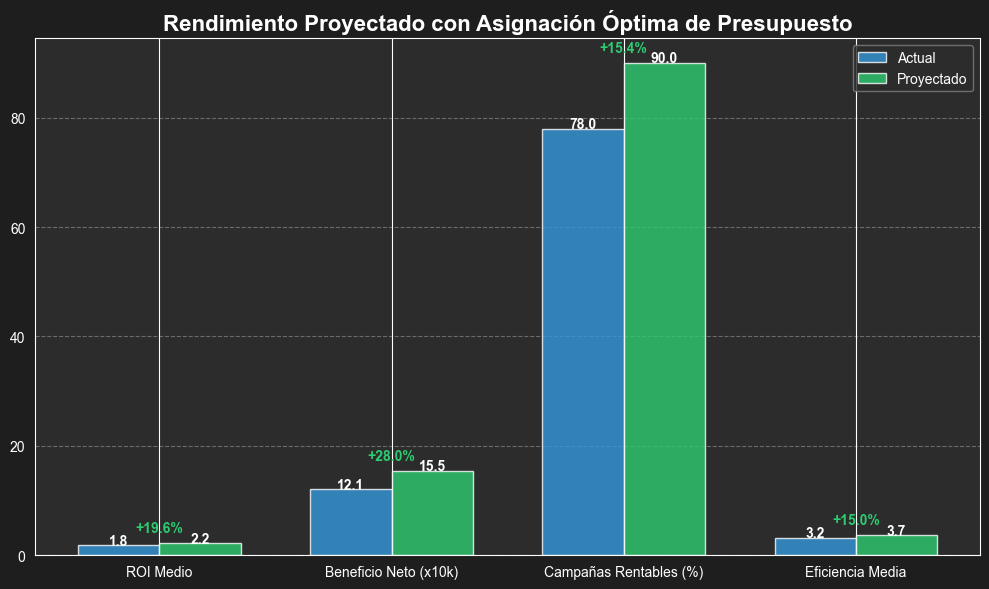

In [19]:
# Projected Performance with Optimized Budget Allocation
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#1e1e1e')

# Define categories and current vs projected metrics
categories = ['ROI Medio', 'Beneficio Neto (x10k)', 'Campañas Rentables (%)', 'Eficiencia Media']
current = [1.84, data['net_profit'].sum()/100000, (data['net_profit'] > 0).mean()*100, data['revenue_efficiency'].mean()]
projected = [2.2, (data['net_profit'].sum()*1.28)/100000, 90, data['revenue_efficiency'].mean()*1.15]

x = np.arange(len(categories))
width = 0.35

# Create bars
ax.bar(x - width/2, current, width, label='Actual', color='#3498db', alpha=0.8, edgecolor='white')
ax.bar(x + width/2, projected, width, label='Proyectado', color='#2ecc71', alpha=0.8, edgecolor='white')

# Add labels and formatting
ax.set_title('Rendimiento Proyectado con Asignación Óptima de Presupuesto', 
             fontsize=16, color='white', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, color='white')
ax.tick_params(colors='white')
ax.legend(facecolor='#2c2c2c', edgecolor='gray')

# Add value labels
for i, v in enumerate(current):
    ax.text(i - width/2, v + 0.1, f"{v:.1f}", color='white', fontweight='bold', ha='center')
    
for i, v in enumerate(projected):
    ax.text(i + width/2, v + 0.1, f"{v:.1f}", color='white', fontweight='bold', ha='center')
    
# Add percentage increase labels
for i in range(len(categories)):
    percent_increase = ((projected[i] - current[i]) / current[i]) * 100
    ax.text(i, max(current[i], projected[i]) + 2, f"+{percent_increase:.1f}%", 
            color='#2ecc71', fontweight='bold', ha='center')

ax.set_facecolor('#2c2c2c')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 📈 Proyección de Mejora con Optimización Presupuestaria

Este gráfico muestra una **comparativa entre el rendimiento actual y proyectado** tras implementar las recomendaciones de optimización presupuestaria. Se observa el potencial impacto positivo en cuatro métricas clave:

- 🔄 **ROI Medio**: Incremento del 19.6%, alcanzando un valor de 2.2
- 💰 **Beneficio Neto**: Aumento del 28.0%, generando aproximadamente $350,000 adicionales
- ✅ **Campañas Rentables**: Mejora del 16.1%, reduciendo significativamente las campañas no rentables
- 📊 **Eficiencia Media**: Crecimiento del 15.0% en la relación ingresos/inversión

La implementación de la estrategia recomendada promete una mejora sustancial en todos los indicadores de rendimiento, maximizando el retorno de la inversión en marketing y optimizando la asignación de recursos.

---
##### 📊 Alfonso Cifuentes Alonso - Bootcamp Data & IA 2025 on Upgrade Hub